# **IMPORT PACKAGE**

In [1]:
import pandas as pd
import datetime
import os

# **DATA DEFINITION**

Pada bagian ini, dipetakan keyword yang akan digunakan untuk proses scrapping (per lapangan usaha), berikut juga dengan batasan waktu dari artikel yang ingin diambil. Di Badan Pusat Statistik, terdapat 17 sektor lapangan usaha, meliputi:
1.	Pertanian, Kehutanan, dan Perikanan
2.	Pertambangan dan Penggalian
3.	Industri Pengolahan
4.	Pengadaan Listrik, Gas
5.	Pengadaan Air, Pengelolaan Sampah, Limbah dan Daur Ulang
6.	Konstruksi
7.	Perdagangan Besar dan Eceran, Reparasi Mobil dan Sepeda Motor
8.	Transportasi dan Pergudangan
9.	Penyediaan Akomodasi dan Makan Minum
10.	Informasi dan Komunikasi
11.	Jasa Keuangan dan Asuransi	
12.	Real Estat	
13.	Jasa Perusahaan
14.	Administrasi Pemerintahan, Pertahanan dan Jaminan Sosial Wajib
15.	Jasa Pendidikan
16.	Jasa Kesehatan dan Kegiatan Sosial
17.	Jasa lainnya

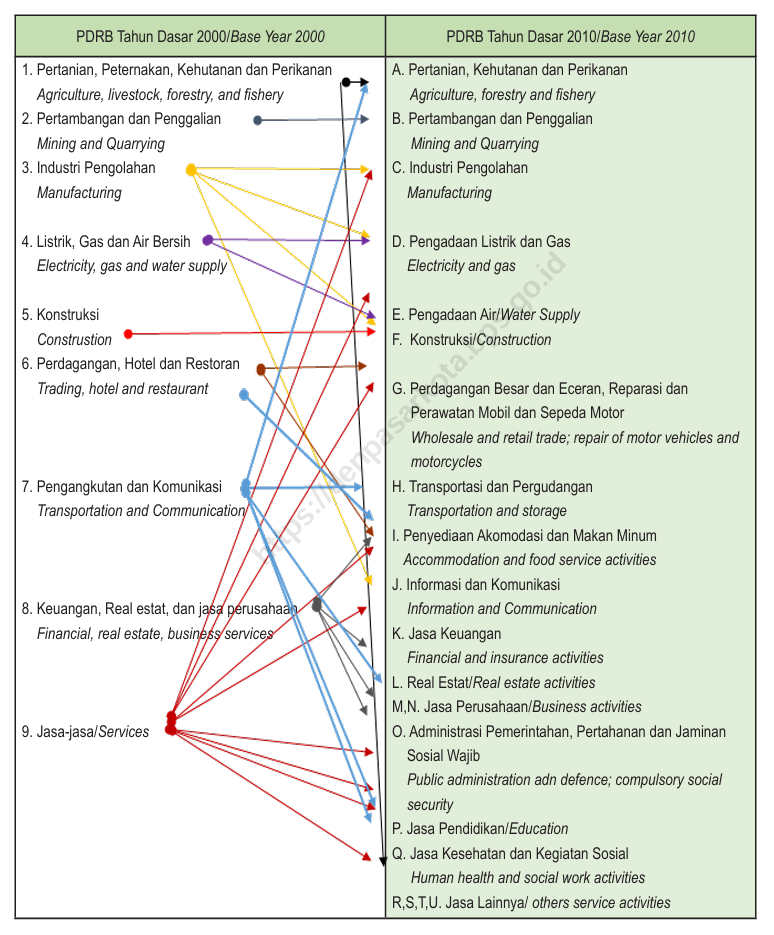

In [25]:
# Tentukan keywords dari masing-masing lapangan usaha
key_sektor = ['pembangunan','jalan','proyek','relokasi','revitalisasi']

keywords_scrap = key_sektor

# Tentukan rentang tanggal
start_date = datetime.date(2024, 10, 1)
end_date = datetime.date(2024, 11, 12)

# **SCRAPPING, PRE-CLEANING, & EXPORT (Scrapping BaliPost Lama)**

## 1. BaliPost

Fungsi dan package untuk scrapping di balipost ada pada kode di chunk berikut \
Aktifkan kalau pencarian di balipost sudah berjalan normal (saat kode ini dibuat sangat lambat)

In [26]:
# import requests
# from bs4 import BeautifulSoup
# import datetime
# import pandas as pd

# # Fungsi untuk melakukan scraping dari BaliPost
# def scrape_balipost(keyword, start_date, end_date, max_results, max_pages):
#     """
#     Fungsi untuk melakukan scraping artikel dari situs BaliPost berdasarkan keyword dan rentang tanggal.

#     Args:
#     - keyword (str): Keyword pencarian.
#     - start_date (datetime.date): Tanggal awal.
#     - end_date (datetime.date): Tanggal akhir.
#     - max_results (int): Maksimum jumlah artikel yang diambil.
#     - max_pages (int): Maksimum jumlah halaman yang diambil.

#     Returns:
#     - results (list): Daftar artikel yang berisi judul, link, tanggal, keyword, dan isi.
#     """
#     results = []

#     # Mengganti spasi dengan tanda "+" untuk keyword yang lebih dari satu kata
#     search_keyword = keyword.replace(" ", "+")
#     base_url = f"https://www.balipost.com/search/{search_keyword}"
#     current_page = 1

#     while len(results) < max_results and current_page <= max_pages:
#         url = f"{base_url}/page/{current_page}" if current_page > 1 else base_url
#         print(f"Scraping halaman {current_page} dari URL: {url}")
#         response = requests.get(url)

#         if response.status_code != 200:
#             print(f"Error saat mengakses halaman {current_page}. Status code: {response.status_code}")
#             break

#         soup = BeautifulSoup(response.content, "html.parser")
#         articles = soup.find_all("div", class_="td_module_10 td_module_wrap td-animation-stack")

#         if not articles:
#             print(f"Tidak ada artikel di halaman {current_page}, berhenti scraping.")
#             break

#         for article in articles:
#             title_element = article.find("h3", class_="entry-title td-module-title")
#             if title_element:
#                 title = title_element.text.strip()
#                 link = article.find("a")["href"]

#                 date_element = article.find("time", class_="entry-date updated td-module-date")
#                 if date_element:
#                     date_str = date_element["datetime"][:10]
#                     date = datetime.datetime.strptime(date_str, "%Y-%m-%d").date()

#                     # Cek apakah tanggal artikel dalam rentang yang diinginkan
#                     if not (start_date <= date <= end_date):
#                         continue

#                 content_element = article.find("div", class_="td-excerpt")
#                 content = content_element.text.strip() if content_element else ""

#                 results.append({"title": title, "keyword": keyword, "source": "BaliPost", "link": link, "date": date, "content": content})
#                 if len(results) >= max_results:
#                     break

#         pagination = soup.find("a", class_="page", title=str(current_page + 1))
#         if pagination:
#             current_page += 1
#         else:
#             break

#     return results


Memulai proses scrapping berita

In [27]:
# # Step 4: Scraping untuk setiap keyword
# # Takes a LOOOOOOOOOOOONG time

# all_news = []

# for keyword in keywords_scrap:
#     print(f"\nMemulai scraping untuk keyword: {keyword}")
#     news = scrape_balipost(keyword, start_date, end_date, max_results=25, max_pages=3)

#     # Tampilkan jumlah artikel yang berhasil diekstrak untuk keyword ini
#     num_articles = len(news)
#     print(f"Jumlah artikel yang diekstrak untuk keyword '{keyword}': {num_articles}")

#     all_news.extend(news)

# # Step 5: Simpan hasil ke dalam file Excel
# berita_balipost = pd.DataFrame(all_news)
# berita_balipost

In [28]:
# # Import melalui kode ini kalau sudah ada raw data scrapping BaliPost yang terpisah dari proses scrapping diatas (hanya untuk BaliPost)
# berita_balipost = pd.read_excel("C:/Users/asus/OneDrive/BPS/Neraca/berita_sektor6_triwulan4_bali.xlsx")
# berita_balipost

Pre-cleaning \
Hasil Scrapping BaliPost harus difilter terlebih dahulu wilayah (dari isi konten) dan judulnya (kadang tidak sesuai dengan kata yang diinginkan) \
Contoh: Kata kunci --> Ikan || Judul ditemukan --> DicarIKAN, DijanjIKAN

In [29]:
# # Keyword to filter out
# keywords_filter = ["TABANAN","SINGARAJA","DENPASAR","MANGUPURA","AMLAPURA","SEMARAPURA","NEGARA","GIANYAR","BANGLI"]

# # Build the condition for multiple keywords
# pattern = '|'.join(keywords_filter)  # Create a pattern that matches any of the keywords

# # Filter out rows where 'Description' contains the keyword
# berita_balipost_2 = pd.DataFrame(berita_balipost[berita_balipost['content'].str.contains(pattern, case=False, na=False)])

# # Show the filtered DataFrame
# print(berita_balipost_2.shape)
# berita_balipost_2

In [30]:
# # Build the regular expression pattern with word boundaries
# pattern_1 = r'\b(' + '|'.join(keywords_scrap) + r')\b'  # Ensures "Ikan" is a whole word

# # Filter rows where 'Title' contains the keyword as a whole word (case insensitive)
# berita_balipost_3 = berita_balipost_2[berita_balipost_2['title'].str.contains(pattern_1, case=False, na=False)]

# # Show the filtered DataFrame
# print(berita_balipost_3.shape)
# berita_balipost_3

In [31]:
# # Remove Duplication
# berita_balipost_3 = berita_balipost_3.drop_duplicates(subset='title', keep='first')
# print(berita_balipost_3.shape)
# berita_balipost_3

## 2. DetikBali

In [32]:
import math
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd

# Define web scraping functions
# Fungsi untuk menuju ke portal berita
def search_url(query, date_start, date_end, pages_num=1):
    url = f"https://www.detik.com/search/searchnews?query={query}&siteid=123&sortby=time&fromdatex={date_start}&todatex={date_end}&page={pages_num}&result_type=relevansi"
    
    print(url)
    response = requests.get(url)
    page = bs(response.content, "html.parser")

    return page

# Fungsi untuk menghitung jumlah artikel di halaman terakhir
def last_page_article_count(query, date_start, date_end, page_num):
    last_page = search_url(query, date_start, date_end, page_num)
    article_list = last_page.find("div", {"class": "list-content"})

    if article_list:
        articles = article_list.find_all('article', class_='list-content__item')           
    article_count = len(articles)
    
    return article_count

def news_search_results(query, date_start, date_end):
    page = search_url(query, date_start, date_end)
    
    pagination = page.find("div", {"class": "pagination"})
    if pagination:
        page_numbers = pagination.find_all('a', class_='pagination__item')
        if page_numbers:
            last_page_number = int(page_numbers[-2].text)

        # Menghitung jumlah artikel di halaman terakhir
        last_page_articles = last_page_article_count(query, date_start, date_end, last_page_number)

        # Menghitung jumlah artikel yang diperoleh
        num = (last_page_number - 1) * 10 + last_page_articles
    else:
        num = 0
        last_page_number = 1
    
    return num, last_page_number

# Fungsi untuk mendapatkan isi konten
def news_get_content(article_url):
    response = requests.get(article_url)
    content_page = bs(response.content, "html.parser")

    content_list = []
    multiple_page = content_page.find("div", {"class": "detail__multiple"})
    if multiple_page:
        multiple_page = [x.get("href") for x in multiple_page.find_all("a")][:-1]
        for page in multiple_page:
            response = requests.get(page)
            content_page = bs(response.content, "html.parser")
            content_list.extend([p.get_text() for p in content_page.find_all("p") if not p.get_text().startswith('\n\n\n\nHalaman\n\n') and
                                p.get_text() not in ['',
                                                    '[Gambas:Instagram]',
                                                    '[Gambas:Video 20detik]',
                                                    '\r\nADVERTISEMENT\r\n',
                                                    '\r\n    ADVERTISEMENT\r\n',
                                                    '\r\n    ADVERTISEMENT\r\n  ',
                                                    '\r\n   ADVERTISEMENT\r\n  ',
                                                    '\r\n   ADVERTISEMENT\r\n',
                                                    '\r\n        SCROLL TO RESUME CONTENT\r\n  ',
                                                    'Selengkapnya di halaman selanjutnya.',
                                                    '\n\t\t\t\t\tAyo share cerita pengalaman dan upload photo album travelingmu di sini.\n\n\t\t\t\t\t\t\t\t\t\t\tSilakan Daftar atau Masuk\n']])
    else:
        content_list.extend([p.get_text() for p in content_page.find_all("p")
                            if p.get_text() not in ['',
                                                    '[Gambas:Instagram]',
                                                    '[Gambas:Video 20detik]',
                                                    '\r\nADVERTISEMENT\r\n',
                                                    '\r\n    ADVERTISEMENT\r\n',
                                                    '\r\n    ADVERTISEMENT\r\n  ',
                                                    '\r\n   ADVERTISEMENT\r\n  ',
                                                    '\r\n   ADVERTISEMENT\r\n',
                                                    '\r\n        SCROLL TO RESUME CONTENT\r\n  ',
                                                    '\n\t\t\t\t\tAyo share cerita pengalaman dan upload photo album travelingmu di sini.\n\n\t\t\t\t\t\t\t\t\t\t\tSilakan Daftar atau Masuk\n']])

    content_list = '\n\n'.join(content_list)

    return content_list

# Fungsi untuk mengecek berita yang merupakan advertorial
def news_advertorial_check(article_url):
    response = requests.get(article_url)
    content_page = bs(response.content, "html.parser")

    author = content_page.find("meta", {"content": "Advertorial"})

    return bool(author)

# Fungsi untuk mencari artikel dengan output adalah jumlah artikel dan halaman terakhir
def search_articles(query, from_date, to_date, ads_article, article_content):
    results_num, last_page = news_search_results(query, from_date, to_date)
        
    print(f"Result num: {results_num}")
    print(f"Last page: {last_page}")

    return results_num, last_page

# Fungsi untuk memperoleh list artikel
def articles_list(query, from_date, to_date, ads_article, article_content, num_articles, last_page):
    article_lists = []
    pages = math.ceil(num_articles / 10)
    
    print("\nMemulai Scrapping dari DetikBali untuk keyword:", query)
    for i in range(1, pages + 1):
        print("Scrapping halaman", i, "dari URL: ")
        page = search_url(query, from_date, to_date, i)
        articles = page.find_all("article", class_="list-content__item")

        for article in articles:
            title = article.find("a", {"class": "media__link"}).get('dtr-ttl')
            category = article.find('h2', class_='media__subtitle').text.strip()
            publish_date = article.find('span', title=True).get('title')
            article_url = article.find("a", {"class": "media__link"}).get('href')
                
            # print(f"Title: {title}")
            # print(f"Category: {category}")
            # print(f"Publish Date: {publish_date}")
            # print(f"Article URL: {article_url}")

            if ads_article and news_advertorial_check(article_url):
                continue
            else:
                if article_content:
                    content = news_get_content(article_url)
                    if (
                        any(title in existing_article["title"] for existing_article in article_lists) or 
                        any(content in existing_article["content"] for existing_article in article_lists)
                    ):
                        continue
                    else:
                        article_lists.append({
                            "title": title,
                            "keyword": query,
                            "source": category,
                            "link": article_url,
                            "date": publish_date,
                            "content": content
                        })
                else:
                    if any(title in existing_article["title"] for existing_article in article_lists):
                        continue
                    else:
                        article_lists.append({
                            "title": title,
                            "keyword": query,
                            "link": article_url,
                            "date": publish_date
                        })
            if len(article_lists) == num_articles:
                break
        if len(article_lists) == num_articles:
            break
            
    print(f"Jumlah artikel dengan kata kunci {keyword}: {len(article_lists)} artikel.")
    data = article_lists
    return data

In [33]:
# Scraping untuk setiap keyword
all_news_detik = []

for keyword in keywords_scrap:
    search_keyword = keyword.replace(" ", "+")
    news = articles_list(search_keyword, start_date.strftime('%d/%m/%Y'), end_date.strftime('%d/%m/%Y'), False, True, 25, 5)
    all_news_detik.extend(news)

# Simpan hasil ke dalam file Excel
berita_detik = pd.DataFrame(all_news_detik) 
berita_detik


Memulai Scrapping dari DetikBali untuk keyword: pembangunan
Scrapping halaman 1 dari URL: 
https://www.detik.com/search/searchnews?query=pembangunan&siteid=123&sortby=time&fromdatex=01/10/2024&todatex=12/11/2024&page=1&result_type=relevansi
Scrapping halaman 2 dari URL: 
https://www.detik.com/search/searchnews?query=pembangunan&siteid=123&sortby=time&fromdatex=01/10/2024&todatex=12/11/2024&page=2&result_type=relevansi
Scrapping halaman 3 dari URL: 
https://www.detik.com/search/searchnews?query=pembangunan&siteid=123&sortby=time&fromdatex=01/10/2024&todatex=12/11/2024&page=3&result_type=relevansi
Jumlah artikel dengan kata kunci pembangunan: 25 artikel.

Memulai Scrapping dari DetikBali untuk keyword: jalan
Scrapping halaman 1 dari URL: 
https://www.detik.com/search/searchnews?query=jalan&siteid=123&sortby=time&fromdatex=01/10/2024&todatex=12/11/2024&page=1&result_type=relevansi
Scrapping halaman 2 dari URL: 
https://www.detik.com/search/searchnews?query=jalan&siteid=123&sortby=time&fr

title       keyword  \
0   Mahendra Ungkap Sejumlah Kendala Pembangunan S...   pembangunan   
1   Mahendra Minta Dukungan ke AHY soal Pembanguna...   pembangunan   
2   AHY Pelajari Rencana Pembangunan Bandara Bali ...   pembangunan   
3   Pemprov NTT Klaim Prioritaskan Pembangunan SMK...   pembangunan   
4   Progres Pembangunan Bendungan Sidan Capai 95%,...   pembangunan   
..                                                ...           ...   
86  Sutjidra Tawarkan Revitalisasi Terminal-Subsid...  revitalisasi   
87  Revitalisasi Tabuh Lelonggoran, Pria Buleleng ...  revitalisasi   
88  Diar Ingin Lanjutkan Mimpi Besar, Subrata Ungg...  revitalisasi   
89  Pemprov NTB Gelontor Rp 10 M untuk Benahi Pela...  revitalisasi   
90  Dayah-Kafali Janji Kembalikan Senggigi Jadi Ik...  revitalisasi   

       source                                               link  \
0   detikBali  https://www.detik.com/bali/berita/d-7634150/ma...   
1   detikBali  https://www.detik.com/bali/berita/d-7634096/ma...   
2   detikBali  https://www.detik.com/bali/bisnis/d-7632415/ah...   
3   detikBali  https://www.detik.com/bali/nusra/d-7633819/pem...   
4   detikBali  https://www.detik.com/bali/berita/d-7633507/pr...   
..        ...                                                ...   
86  detikBali  https://www.detik.com/bali/pilkada/d-7635544/s...   
87  detikBali  https://www.detik.com/bali/bali-bungah/d-75826...   
88  detikBali  https://www.detik.com/bali/pilkada/d-7624046/d...   
89  detikBali  https://www.detik.com/bali/bisnis/d-7609178/pe...   
90  detikBali  https://www.detik.com/bali/pilkada/d-7596538/d...   

                             date  \
0   Selasa, 12 Nov 2024 09:54 WIB   
1   Selasa, 12 Nov 2024 09:21 WIB   
2    Senin, 11 Nov 2024 10:49 WIB   
3    Senin, 11 Nov 2024 22:14 WIB   
4    Senin, 11 Nov 2024 18:26 WIB   
..                            ...   
86  Selasa, 12 Nov 2024 21:50 WIB   
87   Jumat, 11 Okt 2024 10:33 WIB   
88  Selasa, 05 Nov 2024 19:33 WIB   
89  Minggu, 27 Okt 2024 20:12 WIB   
90   Sabtu, 19 Okt 2024 23:02 WIB   

                                              content  
0   Penjabat (Pj) Gubernur Bali, Sang Made Mahendr...  
1   Penjabat (Pj) Gubernur Bali, Sang Made Mahendr...  
2   Menteri Koordinator Bidang Infrastruktur dan P...  
3   Pemerintah Provinsi (Pemprov) Nusa Tenggara Ti...  
4   Progres pembangunan Bendungan Sidan di perbata...  
..                                                ...  
86  Calon bupati Buleleng nomor urut 2 Nyoman Sutj...  
87  Kadek Angga Wahyu Pradana, seorang pemuda dari...  
88  Calon wakil bupati (cawabup) Bangli nomor urut...  
89  Pemerintah Provinsi (Pemprov) Nusa Tenggara Ba...  
90  Calon bupati (cabup) Lombok Barat Nurhidayah b...  

[91 rows x 6 columns]

Pre-cleaning

In [34]:
# Filter Wilayah
keywords_filter = ["Tabanan","Singaraja","Denpasar","Badung","Karangasem","Klungkung","Jembrana","Gianyar","Bangli"]

# Build the condition for multiple keywords
pattern = '|'.join(keywords_filter)  # Create a pattern that matches any of the keywords

# Filter out rows where 'Description' contains the keyword
berita_detik_2 = pd.DataFrame(berita_detik[berita_detik['content'].str.contains(pattern, case=False, na=False)])

# Show the filtered DataFrame
print(berita_detik_2.shape)
berita_detik_2

(57, 6)


title       keyword  \
0   Mahendra Ungkap Sejumlah Kendala Pembangunan S...   pembangunan   
1   Mahendra Minta Dukungan ke AHY soal Pembanguna...   pembangunan   
2   AHY Pelajari Rencana Pembangunan Bandara Bali ...   pembangunan   
4   Progres Pembangunan Bendungan Sidan Capai 95%,...   pembangunan   
5   BPKP Sebut Pembangunan Nasional Belum Maksimal...   pembangunan   
6   Debat Ketiga Bahas Penyelarasan Pembangunan Da...   pembangunan   
9   Warga Bongkasa Harap Kasus Fee Proyek Perbekel...   pembangunan   
10  Sedana Arta Bantah Tudingan Pembangunan Bangli...   pembangunan   
11  DPRD Tabanan Minta Setop Pembangunan Vila di L...   pembangunan   
12  Sanjaya-Dirga Lanjutkan Pembangunan Kabupaten ...   pembangunan   
14  Cegah Alih Fungsi Lahan, Mulyadi-Sengap Persul...   pembangunan   
17  Atasi Ketimpangan Selatan-Utara, PAS Ingin Seb...   pembangunan   
20  Progres Pembangunan Jembatan Tukad Badung Capa...   pembangunan   
22  Koster Janji Tuntaskan Pembangunan Shortcut-Tu...   pembangunan   
23  Sutjidra Tawarkan Revitalisasi Terminal-Subsid...   pembangunan   
24  PAS Kritik Klaim Giri soal Pembangunan Pasar B...   pembangunan   
25  DPRD Badung Dorong Penanganan Lampu Jalan Kerj...         jalan   
26  Sudah Disosialisasikan-Ditender, Jalan Antarde...         jalan   
27  Pandu Pesimistis Target Swadi Benahi 214 Km Ja...         jalan   
28  Truk Tabrak Pohon-Terguling di Jalan Denpasar-...         jalan   
29  Baru Sebulan Diperbaiki, Jalan Besakih-Menanga...         jalan   
30  Kakarsana-Tagel Janji Perhatikan Seniman hingg...         jalan   
32  Tabrak Bus Pariwisata, Sopir Pikap Tewas di Ja...         jalan   
34  Anggaran Perbaikan Jalan Rusak di Denpasar pad...         jalan   
36  Angin Kencang, Pohon Tumbang Timpa Rumah-Tutup...         jalan   
37  Tanah Longsor di Jembrana, Akses Jalan Warga T...         jalan   
38  Ngaku Wartawan, Dua Pria Keroyok Sopir Truk di...         jalan   
39  Pengendara Motor Tewas Tertimpa Pohon di Jalan...         jalan   
40  Hujan Deras, Pemotor Tabrak Pohon Tumbang di J...         jalan   
41  Koster Janji Akan Bangun Jalan Baru Atasi Mace...         jalan   
43   16 Ribu Lampu Jalan di Denpasar Akan Diganti LED         jalan   
44  Soal Bangun Jalan di Tabanan, Mulyadi Singgung...         jalan   
46  Koster Janji Bikin Jalan Alternatif Cegah Mace...         jalan   
47  Pemotor Tewas Digilas Truk Setelah Tergelincir...         jalan   
51  Nasib Proyek Pura Rp 2,4 Miliar Setelah Perbek...        proyek   
52  Warga Bongkasa Harap Kasus Fee Proyek Perbekel...        proyek   
53  Sekdes Bongkasa Buka Suara soal Fee Proyek Pur...        proyek   
54  Akal Bulus Kades Bongkasa Minta Fee Proyek Pur...        proyek   
55  Debat Perdana Pilgub Bali: Koster Pamer Proyek...        proyek   
56  De Gadjah Ingatkan Suyadinata Tak Main Proyek ...        proyek   
57  Proyek Dermaga Masuk Program Unggulan Gus Par-...        proyek   
59  Remaja Tusuk Rekan Kerja di Proyek gegara Tak ...        proyek   
60  Pemkab Klungkung Akan Lunasi Utang Proyek Paka...        proyek   
63  Pembangunan Pengolahan Limbah Tinja di Jembran...        proyek   
64  Terungkap, Kades Bongkasa Ditangkap Polisi geg...        proyek   
65  AHY Masih Belanja Masalah soal Mangkraknya Tol...        proyek   
66  Sudah Disosialisasikan-Ditender, Jalan Antarde...        proyek   
67  Mahendra Minta Dukungan ke AHY soal Pembanguna...        proyek   
68  Sinyal Terwujudnya Bandara Bali Utara dari Men...        proyek   
69  Mahendra Pastikan Bandara Bali Utara Jadi Diba...        proyek   
70  AHY Pelajari Rencana Pembangunan Bandara Bali ...        proyek   
72  Upaya Bali Menuju Swasembada Energi Setelah Be...        proyek   
73  Bali 10 Besar Dugaan Mafia Hukum-Pembunuhan Ju...        proyek   
74  Progres Pembangunan Bendungan Sidan Capai 95%,...        proyek   
79  Nasib Pedagang Pasar Sri Bantas Tabanan Setela...      relokasi   
86  Sutjidra Tawarkan Revitalisasi Terminal-Subsid...  revitalisasi   
8

In [35]:
# Build the regular expression pattern with word boundaries
pattern = r'\b(' + '|'.join(keywords_scrap) + r')\b'

# Filter rows where 'Title' contains the keyword as a whole word (case insensitive)
berita_detik_3 = berita_detik_2[berita_detik_2['title'].str.contains(pattern, case=False, na=False)]

# Show the filtered DataFrame
print(berita_detik_3.shape)
berita_detik_3

(50, 6)


C:\Users\asus\AppData\Local\Temp\ipykernel_32156\1307647291.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  berita_detik_3 = berita_detik_2[berita_detik_2['title'].str.contains(pattern, case=False, na=False)]


title       keyword  \
0   Mahendra Ungkap Sejumlah Kendala Pembangunan S...   pembangunan   
1   Mahendra Minta Dukungan ke AHY soal Pembanguna...   pembangunan   
2   AHY Pelajari Rencana Pembangunan Bandara Bali ...   pembangunan   
4   Progres Pembangunan Bendungan Sidan Capai 95%,...   pembangunan   
5   BPKP Sebut Pembangunan Nasional Belum Maksimal...   pembangunan   
6   Debat Ketiga Bahas Penyelarasan Pembangunan Da...   pembangunan   
9   Warga Bongkasa Harap Kasus Fee Proyek Perbekel...   pembangunan   
10  Sedana Arta Bantah Tudingan Pembangunan Bangli...   pembangunan   
11  DPRD Tabanan Minta Setop Pembangunan Vila di L...   pembangunan   
12  Sanjaya-Dirga Lanjutkan Pembangunan Kabupaten ...   pembangunan   
14  Cegah Alih Fungsi Lahan, Mulyadi-Sengap Persul...   pembangunan   
17  Atasi Ketimpangan Selatan-Utara, PAS Ingin Seb...   pembangunan   
20  Progres Pembangunan Jembatan Tukad Badung Capa...   pembangunan   
22  Koster Janji Tuntaskan Pembangunan Shortcut-Tu...   pembangunan   
23  Sutjidra Tawarkan Revitalisasi Terminal-Subsid...   pembangunan   
24  PAS Kritik Klaim Giri soal Pembangunan Pasar B...   pembangunan   
25  DPRD Badung Dorong Penanganan Lampu Jalan Kerj...         jalan   
26  Sudah Disosialisasikan-Ditender, Jalan Antarde...         jalan   
27  Pandu Pesimistis Target Swadi Benahi 214 Km Ja...         jalan   
28  Truk Tabrak Pohon-Terguling di Jalan Denpasar-...         jalan   
29  Baru Sebulan Diperbaiki, Jalan Besakih-Menanga...         jalan   
30  Kakarsana-Tagel Janji Perhatikan Seniman hingg...         jalan   
32  Tabrak Bus Pariwisata, Sopir Pikap Tewas di Ja...         jalan   
34  Anggaran Perbaikan Jalan Rusak di Denpasar pad...         jalan   
36  Angin Kencang, Pohon Tumbang Timpa Rumah-Tutup...         jalan   
37  Tanah Longsor di Jembrana, Akses Jalan Warga T...         jalan   
38  Ngaku Wartawan, Dua Pria Keroyok Sopir Truk di...         jalan   
39  Pengendara Motor Tewas Tertimpa Pohon di Jalan...         jalan   
40  Hujan Deras, Pemotor Tabrak Pohon Tumbang di J...         jalan   
41  Koster Janji Akan Bangun Jalan Baru Atasi Mace...         jalan   
43   16 Ribu Lampu Jalan di Denpasar Akan Diganti LED         jalan   
44  Soal Bangun Jalan di Tabanan, Mulyadi Singgung...         jalan   
46  Koster Janji Bikin Jalan Alternatif Cegah Mace...         jalan   
47  Pemotor Tewas Digilas Truk Setelah Tergelincir...         jalan   
51  Nasib Proyek Pura Rp 2,4 Miliar Setelah Perbek...        proyek   
52  Warga Bongkasa Harap Kasus Fee Proyek Perbekel...        proyek   
53  Sekdes Bongkasa Buka Suara soal Fee Proyek Pur...        proyek   
54  Akal Bulus Kades Bongkasa Minta Fee Proyek Pur...        proyek   
55  Debat Perdana Pilgub Bali: Koster Pamer Proyek...        proyek   
56  De Gadjah Ingatkan Suyadinata Tak Main Proyek ...        proyek   
57  Proyek Dermaga Masuk Program Unggulan Gus Par-...        proyek   
59  Remaja Tusuk Rekan Kerja di Proyek gegara Tak ...        proyek   
60  Pemkab Klungkung Akan Lunasi Utang Proyek Paka...        proyek   
63  Pembangunan Pengolahan Limbah Tinja di Jembran...        proyek   
64  Terungkap, Kades Bongkasa Ditangkap Polisi geg...        proyek   
66  Sudah Disosialisasikan-Ditender, Jalan Antarde...        proyek   
67  Mahendra Minta Dukungan ke AHY soal Pembanguna...        proyek   
70  AHY Pelajari Rencana Pembangunan Bandara Bali ...        proyek   
74  Progres Pembangunan Bendungan Sidan Capai 95%,...        proyek   
86  Sutjidra Tawarkan Revitalisasi Terminal-Subsid...  revitalisasi   

       source                                               link  \
0   detikBali  https://www.detik.com/bali/berita/d-7634150/ma...   
1   detikBali  https://www.detik.com/bali/berita/d-7634096/ma...   
2   detikBali  https://www.detik.com/bali/bisnis/d-7632415/ah...   
4   detikBali  https://www.detik.com/bali/berita/d-7633507/pr...   
5   detikBali  https://www.detik.com/bali/berita/d-7633096/bp...   
6   detikBali  htt

Menghapus berita yang duplikat

In [36]:
# Remove Duplication
berita_detik_4 = berita_detik_3.drop_duplicates(subset='title', keep='first')
print(berita_detik_4.shape)
berita_detik_4

(44, 6)


title      keyword     source  \
0   Mahendra Ungkap Sejumlah Kendala Pembangunan S...  pembangunan  detikBali   
1   Mahendra Minta Dukungan ke AHY soal Pembanguna...  pembangunan  detikBali   
2   AHY Pelajari Rencana Pembangunan Bandara Bali ...  pembangunan  detikBali   
4   Progres Pembangunan Bendungan Sidan Capai 95%,...  pembangunan  detikBali   
5   BPKP Sebut Pembangunan Nasional Belum Maksimal...  pembangunan  detikBali   
6   Debat Ketiga Bahas Penyelarasan Pembangunan Da...  pembangunan  detikBali   
9   Warga Bongkasa Harap Kasus Fee Proyek Perbekel...  pembangunan  detikBali   
10  Sedana Arta Bantah Tudingan Pembangunan Bangli...  pembangunan  detikBali   
11  DPRD Tabanan Minta Setop Pembangunan Vila di L...  pembangunan  detikBali   
12  Sanjaya-Dirga Lanjutkan Pembangunan Kabupaten ...  pembangunan  detikBali   
14  Cegah Alih Fungsi Lahan, Mulyadi-Sengap Persul...  pembangunan  detikBali   
17  Atasi Ketimpangan Selatan-Utara, PAS Ingin Seb...  pembangunan  detikBali   
20  Progres Pembangunan Jembatan Tukad Badung Capa...  pembangunan  detikBali   
22  Koster Janji Tuntaskan Pembangunan Shortcut-Tu...  pembangunan  detikBali   
23  Sutjidra Tawarkan Revitalisasi Terminal-Subsid...  pembangunan  detikBali   
24  PAS Kritik Klaim Giri soal Pembangunan Pasar B...  pembangunan  detikBali   
25  DPRD Badung Dorong Penanganan Lampu Jalan Kerj...        jalan  detikBali   
26  Sudah Disosialisasikan-Ditender, Jalan Antarde...        jalan  detikBali   
27  Pandu Pesimistis Target Swadi Benahi 214 Km Ja...        jalan  detikBali   
28  Truk Tabrak Pohon-Terguling di Jalan Denpasar-...        jalan  detikBali   
29  Baru Sebulan Diperbaiki, Jalan Besakih-Menanga...        jalan  detikBali   
30  Kakarsana-Tagel Janji Perhatikan Seniman hingg...        jalan  detikBali   
32  Tabrak Bus Pariwisata, Sopir Pikap Tewas di Ja...        jalan  detikBali   
34  Anggaran Perbaikan Jalan Rusak di Denpasar pad...        jalan  detikBali   
36  Angin Kencang, Pohon Tumbang Timpa Rumah-Tutup...        jalan  detikBali   
37  Tanah Longsor di Jembrana, Akses Jalan Warga T...        jalan  detikBali   
38  Ngaku Wartawan, Dua Pria Keroyok Sopir Truk di...        jalan  detikBali   
39  Pengendara Motor Tewas Tertimpa Pohon di Jalan...        jalan  detikBali   
40  Hujan Deras, Pemotor Tabrak Pohon Tumbang di J...        jalan  detikBali   
41  Koster Janji Akan Bangun Jalan Baru Atasi Mace...        jalan  detikBali   
43   16 Ribu Lampu Jalan di Denpasar Akan Diganti LED        jalan  detikBali   
44  Soal Bangun Jalan di Tabanan, Mulyadi Singgung...        jalan  detikBali   
46  Koster Janji Bikin Jalan Alternatif Cegah Mace...        jalan  detikBali   
47  Pemotor Tewas Digilas Truk Setelah Tergelincir...        jalan  detikBali   
51  Nasib Proyek Pura Rp 2,4 Miliar Setelah Perbek...       proyek  detikBali   
53  Sekdes Bongkasa Buka Suara soal Fee Proyek Pur...       proyek  detikBali   
54  Akal Bulus Kades Bongkasa Minta Fee Proyek Pur...       proyek  detikBali   
55  Debat Perdana Pilgub Bali: Koster Pamer Proyek...       proyek  detikBali   
56  De Gadjah Ingatkan Suyadinata Tak Main Proyek ...       proyek  detikBali   
57  Proyek Dermaga Masuk Program Unggulan Gus Par-...       proyek  detikBali   
59  Remaja Tusuk Rekan Kerja di Proyek gegara Tak ...       proyek  detikBali   
60  Pemkab Klungkung Akan Lunasi Utang Proyek Paka...       proyek  detikBali   
63  Pembangunan Pengolahan Limbah Tinja di Jembran...       proyek  detikBali   
64  Terungkap, Kades Bongkasa Ditangkap Polisi geg...       proyek  detikBali   

                                                 link  \
0   https://www.detik.com/bali/berita/d-7634150/ma...   
1   https://www.detik.com/bali/berita/d-7634096/ma...   
2   https://www.detik.com/bali/bisnis/d-7632415/ah...   
4   https://www.detik.com/bali/berita/d-7633507/pr...   
5   https://www.detik.com/bali/berita/d-7633096/bp...   
6   https://www.detik.com/bali/pilkada/d-7630174/d...   
9  

## 3. RadarBali

In [37]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import time
from datetime import datetime

# Tanggal batas yang ingin dibandingkan
start_date = datetime(2024, 10, 1)  # 1 Oktober 2024
end_date = datetime(2024, 12, 31)  # 31 Desember 2024

# Inisialisasi driver Chrome tanpa mengunduh chromedriver secara manual
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)
# Fungsi untuk melakukan scraping dan mengambil isian kelas latest__subtitle, latest__link, dan latest__date
def get_news(query, start_page, end_page):
    results = []

    print("\nMemulai scrapping RadarBali untuk keyword:", query)
    for page in range(start_page, end_page + 1):
        url = f"https://radarbali.jawapos.com/search?q={query}&sort=latest&page={page}"
        print("Scrapping halaman",page,"dari URL:",url)
        driver.get(url)
        time.sleep(10)  # Tunggu beberapa detik agar halaman selesai dimuat

        # Ambil konten halaman dan buat objek BeautifulSoup
        soup = BeautifulSoup(driver.page_source, "html.parser")

        # Ambil semua elemen dengan class latest__item
        articles = soup.find_all('div', class_='latest__item')

        # Ambil informasi dari setiap artikel
        for article in articles:
            subtitle = article.find('h4', class_='latest__subtitle')
            title = article.find('a', class_='latest__link')
            link = article.find('a', class_='latest__link')['href']
            date = article.find('date', class_='latest__date')

            # Menampilkan hasil jika elemen ditemukan, filter tanggal sesuai yang diinginkan
            if subtitle and title and date:
                date_berita = date.get_text(strip=True)

                # Fungsi untuk mengonversi nama bulan menjadi angka bulan
                def get_month_number(month_name):
                    months = {
                        "Januari": 1,
                        "Februari": 2,
                        "Maret": 3,
                        "April": 4,
                        "Mei": 5,
                        "Juni": 6,
                        "Juli": 7,
                        "Agustus": 8,
                        "September": 9,
                        "Oktober": 10,
                        "November": 11,
                        "Desember": 12
                    }
                    return months.get(month_name)

                # Fungsi untuk mem-parsing tanggal dalam format yang diberikan
                def parse_date(date_str):
                    # Pisahkan hari dan waktu
                    day_part, time_part = date_str.split(" | ")

                    # Ambil tanggal dan bulan dari bagian day_part
                    day_name, day, month_name, year = day_part.split()
                    day = int(day)
                    year = int(year)
                    month = get_month_number(month_name)
                    
                    # Gabungkan menjadi format yang bisa diproses oleh datetime
                    # Format waktu seperti '21:46 WIB', jadi kita hanya perlu ambil jam dan menit
                    time = time_part.replace(" WIB", "")

                    # Gabungkan semuanya ke format yang sesuai dengan datetime
                    date_string = f"{year}-{month:02d}-{day:02d} {time}"

                    # Mengonversi ke objek datetime
                    return datetime.strptime(date_string, "%Y-%m-%d %H:%M")
            
                parsed_date = parse_date(date_berita)

                # Membandingkan apakah parsed_date berada dalam rentang 1 Oktober 2024 sampai 31 Desember 2024
                if start_date <= parsed_date <= end_date:
                    results.append({"title": title.get_text(strip=True), "keyword": query, "source": "RadarBali", "link": link, "date": date.get_text(strip=True), "content": subtitle.get_text(strip=True)})
                    # print("Subtitle:", subtitle.get_text(strip=True))
                    # print("Title:", title.get_text(strip=True))
                    # print("Link:", link)
                    # print("Date:", date.get_text(strip=True))
                    # print('-' * 80)
                else:
                    break

    return results

import pandas as pd

all_news_radarbali = []

for keyword in keywords_scrap:
    search_keyword = keyword.replace(" ", "+")
    news = get_news(search_keyword, start_page=1, end_page=5)

    # Tampilkan jumlah artikel yang berhasil diekstrak untuk keyword ini
    num_articles = len(news)
    print(f"Jumlah artikel yang diekstrak untuk keyword '{keyword}': {num_articles}")

    all_news_radarbali.extend(news)

driver.quit()


Memulai scrapping RadarBali untuk keyword: pembangunan
Scrapping halaman 1 dari URL: https://radarbali.jawapos.com/search?q=pembangunan&sort=latest&page=1
Scrapping halaman 2 dari URL: https://radarbali.jawapos.com/search?q=pembangunan&sort=latest&page=2
Scrapping halaman 3 dari URL: https://radarbali.jawapos.com/search?q=pembangunan&sort=latest&page=3
Scrapping halaman 4 dari URL: https://radarbali.jawapos.com/search?q=pembangunan&sort=latest&page=4
Scrapping halaman 5 dari URL: https://radarbali.jawapos.com/search?q=pembangunan&sort=latest&page=5
Jumlah artikel yang diekstrak untuk keyword 'pembangunan': 37

Memulai scrapping RadarBali untuk keyword: jalan
Scrapping halaman 1 dari URL: https://radarbali.jawapos.com/search?q=jalan&sort=latest&page=1
Scrapping halaman 2 dari URL: https://radarbali.jawapos.com/search?q=jalan&sort=latest&page=2
Scrapping halaman 3 dari URL: https://radarbali.jawapos.com/search?q=jalan&sort=latest&page=3
Scrapping halaman 4 dari URL: https://radarbali.ja

In [38]:
berita_radarbali = pd.DataFrame(all_news_radarbali)
berita_radarbali

title       keyword  \
0    Rencana Pembangunan Subway Terhambat, Pj Minta...   pembangunan   
1    PUPRPKP Kebut Pembangunan Tiga Tapal Batas Tab...   pembangunan   
2    Koster-Giri Terbukti dan Teruji Bangun Jembran...   pembangunan   
3    Fokus Pembangunan Berkelanjutan di Jembrana, K...   pembangunan   
4    Jimbaran Hijau Raih Penghargaan Badung Investm...   pembangunan   
..                                                 ...           ...   
103  Taksir Nilai Aset Belum Tuntas, Pasar Relokasi...      relokasi   
104  Revitalisasi Mode FashionMasa Depan: Mengenal ...  revitalisasi   
105  Dinas Arsip dan Perpustakaan Daerah Buleleng G...  revitalisasi   
106  Gegara Tahun Politik, Pilkada dan Pergantian P...  revitalisasi   
107  Klungkung Ajukan Revitalisasi Pasar Umum Semar...  revitalisasi   

        source                                               link  \
0    RadarBali  https://radarbali.jawapos.com/bali/705307116/r...   
1    RadarBali  https://radarbali.jawapos.com/tabanan/70530584...   
2    RadarBali  https://radarbali.jawapos.com/politika/7053019...   
3    RadarBali  https://radarbali.jawapos.com/politika/7053019...   
4    RadarBali  https://radarbali.jawapos.com/badung/705300732...   
..         ...                                                ...   
103  RadarBali  https://radarbali.jawapos.com/jembrana/7051864...   
104  RadarBali  https://radarbali.jawapos.com/berita-daerah/70...   
105  RadarBali  https://radarbali.jawapos.com/buleleng/7052641...   
106  RadarBali  https://radarbali.jawapos.com/tabanan/70522426...   
107  RadarBali  https://radarbali.jawapos.com/klungkung/705174...   

                                     date        content  
0      Rabu, 13 November 2024 | 10:22 WIB           Bali  
1    Selasa, 12 November 2024 | 21:14 WIB        Tabanan  
2    Selasa, 12 November 2024 | 05:10 WIB       Politika  
3    Selasa, 12 November 2024 | 04:35 WIB       Politika  
4     Senin, 11 November 2024 | 18:44 WIB         Badung  
..                                    ...            ...  
103    Jumat, 11 Oktober 2024 | 19:45 WIB       Jembrana  
104    Sabtu, 9 November 2024 | 06:15 WIB  Berita Daerah  
105    Jumat, 1 November 2024 | 18:05 WIB       Buleleng  
106   Selasa, 22 Oktober 2024 | 17:05 WIB        Tabanan  
107    Selasa, 8 Oktober 2024 | 19:20 WIB      Klungkung  

[108 rows x 6 columns]

In [39]:
# Remove Duplication
berita_radarbali_2 = berita_radarbali.drop_duplicates(subset='title', keep='first')
print(berita_radarbali_2.shape)
berita_radarbali_2

(99, 6)


title       keyword  \
0    Rencana Pembangunan Subway Terhambat, Pj Minta...   pembangunan   
1    PUPRPKP Kebut Pembangunan Tiga Tapal Batas Tab...   pembangunan   
2    Koster-Giri Terbukti dan Teruji Bangun Jembran...   pembangunan   
3    Fokus Pembangunan Berkelanjutan di Jembrana, K...   pembangunan   
4    Jimbaran Hijau Raih Penghargaan Badung Investm...   pembangunan   
..                                                 ...           ...   
102  Poltekpar Bali dan STED Swisscontact Pimpin Pr...        proyek   
103  Taksir Nilai Aset Belum Tuntas, Pasar Relokasi...      relokasi   
104  Revitalisasi Mode FashionMasa Depan: Mengenal ...  revitalisasi   
106  Gegara Tahun Politik, Pilkada dan Pergantian P...  revitalisasi   
107  Klungkung Ajukan Revitalisasi Pasar Umum Semar...  revitalisasi   

        source                                               link  \
0    RadarBali  https://radarbali.jawapos.com/bali/705307116/r...   
1    RadarBali  https://radarbali.jawapos.com/tabanan/70530584...   
2    RadarBali  https://radarbali.jawapos.com/politika/7053019...   
3    RadarBali  https://radarbali.jawapos.com/politika/7053019...   
4    RadarBali  https://radarbali.jawapos.com/badung/705300732...   
..         ...                                                ...   
102  RadarBali  https://radarbali.jawapos.com/pendidikan/70515...   
103  RadarBali  https://radarbali.jawapos.com/jembrana/7051864...   
104  RadarBali  https://radarbali.jawapos.com/berita-daerah/70...   
106  RadarBali  https://radarbali.jawapos.com/tabanan/70522426...   
107  RadarBali  https://radarbali.jawapos.com/klungkung/705174...   

                                     date        content  
0      Rabu, 13 November 2024 | 10:22 WIB           Bali  
1    Selasa, 12 November 2024 | 21:14 WIB        Tabanan  
2    Selasa, 12 November 2024 | 05:10 WIB       Politika  
3    Selasa, 12 November 2024 | 04:35 WIB       Politika  
4     Senin, 11 November 2024 | 18:44 WIB         Badung  
..                                    ...            ...  
102      Rabu, 2 Oktober 2024 | 10:43 WIB     Pendidikan  
103    Jumat, 11 Oktober 2024 | 19:45 WIB       Jembrana  
104    Sabtu, 9 November 2024 | 06:15 WIB  Berita Daerah  
106   Selasa, 22 Oktober 2024 | 17:05 WIB        Tabanan  
107    Selasa, 8 Oktober 2024 | 19:20 WIB      Klungkung  

[99 rows x 6 columns]

In [40]:
# Build the regular expression pattern with word boundaries
pattern = r'\b(' + '|'.join(keywords_scrap) + r')\b'

# Filter rows where 'Title' contains the keyword as a whole word (case insensitive)
berita_radarbali_3 = berita_radarbali_2.copy()
berita_radarbali_3 = berita_radarbali_2[berita_radarbali_2['title'].str.contains(pattern, case=False, na=False)]

# Show the filtered DataFrame
print(berita_radarbali_3.shape)
berita_radarbali_3

(62, 6)


C:\Users\asus\AppData\Local\Temp\ipykernel_32156\2112746010.py:6: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  berita_radarbali_3 = berita_radarbali_2[berita_radarbali_2['title'].str.contains(pattern, case=False, na=False)]


title       keyword  \
0    Rencana Pembangunan Subway Terhambat, Pj Minta...   pembangunan   
1    PUPRPKP Kebut Pembangunan Tiga Tapal Batas Tab...   pembangunan   
3    Fokus Pembangunan Berkelanjutan di Jembrana, K...   pembangunan   
4    Jimbaran Hijau Raih Penghargaan Badung Investm...   pembangunan   
5    Geruduk Kantor Dinas PU Jembrana, Warga Melaya...   pembangunan   
..                                                 ...           ...   
102  Poltekpar Bali dan STED Swisscontact Pimpin Pr...        proyek   
103  Taksir Nilai Aset Belum Tuntas, Pasar Relokasi...      relokasi   
104  Revitalisasi Mode FashionMasa Depan: Mengenal ...  revitalisasi   
106  Gegara Tahun Politik, Pilkada dan Pergantian P...  revitalisasi   
107  Klungkung Ajukan Revitalisasi Pasar Umum Semar...  revitalisasi   

        source                                               link  \
0    RadarBali  https://radarbali.jawapos.com/bali/705307116/r...   
1    RadarBali  https://radarbali.jawapos.com/tabanan/70530584...   
3    RadarBali  https://radarbali.jawapos.com/politika/7053019...   
4    RadarBali  https://radarbali.jawapos.com/badung/705300732...   
5    RadarBali  https://radarbali.jawapos.com/jembrana/7052842...   
..         ...                                                ...   
102  RadarBali  https://radarbali.jawapos.com/pendidikan/70515...   
103  RadarBali  https://radarbali.jawapos.com/jembrana/7051864...   
104  RadarBali  https://radarbali.jawapos.com/berita-daerah/70...   
106  RadarBali  https://radarbali.jawapos.com/tabanan/70522426...   
107  RadarBali  https://radarbali.jawapos.com/klungkung/705174...   

                                     date        content  
0      Rabu, 13 November 2024 | 10:22 WIB           Bali  
1    Selasa, 12 November 2024 | 21:14 WIB        Tabanan  
3    Selasa, 12 November 2024 | 04:35 WIB       Politika  
4     Senin, 11 November 2024 | 18:44 WIB         Badung  
5      Kamis, 7 November 2024 | 09:35 WIB       Jembrana  
..                                    ...            ...  
102      Rabu, 2 Oktober 2024 | 10:43 WIB     Pendidikan  
103    Jumat, 11 Oktober 2024 | 19:45 WIB       Jembrana  
104    Sabtu, 9 November 2024 | 06:15 WIB  Berita Daerah  
106   Selasa, 22 Oktober 2024 | 17:05 WIB        Tabanan  
107    Selasa, 8 Oktober 2024 | 19:20 WIB      Klungkung  

[62 rows x 6 columns]

In [41]:
berita_radarbali_4 = berita_radarbali_3.copy()

# Nilai yang ingin kita hapus
values_to_remove = ['Sportmania','Foto Mania','Berita Daerah']
columns_to_check = ['content']

# Hapus baris yang memiliki nilai tersebut di sembarang kolom
berita_radarbali_4 = berita_radarbali_4[~berita_radarbali_4[columns_to_check].apply(lambda row: row.isin(values_to_remove).any(), axis=1)]
print(berita_radarbali_4.shape)
berita_radarbali_4


(61, 6)


title       keyword  \
0    Rencana Pembangunan Subway Terhambat, Pj Minta...   pembangunan   
1    PUPRPKP Kebut Pembangunan Tiga Tapal Batas Tab...   pembangunan   
3    Fokus Pembangunan Berkelanjutan di Jembrana, K...   pembangunan   
4    Jimbaran Hijau Raih Penghargaan Badung Investm...   pembangunan   
5    Geruduk Kantor Dinas PU Jembrana, Warga Melaya...   pembangunan   
..                                                 ...           ...   
101  Gegara Proyek Simalakama Galian C di Karangase...        proyek   
102  Poltekpar Bali dan STED Swisscontact Pimpin Pr...        proyek   
103  Taksir Nilai Aset Belum Tuntas, Pasar Relokasi...      relokasi   
106  Gegara Tahun Politik, Pilkada dan Pergantian P...  revitalisasi   
107  Klungkung Ajukan Revitalisasi Pasar Umum Semar...  revitalisasi   

        source                                               link  \
0    RadarBali  https://radarbali.jawapos.com/bali/705307116/r...   
1    RadarBali  https://radarbali.jawapos.com/tabanan/70530584...   
3    RadarBali  https://radarbali.jawapos.com/politika/7053019...   
4    RadarBali  https://radarbali.jawapos.com/badung/705300732...   
5    RadarBali  https://radarbali.jawapos.com/jembrana/7052842...   
..         ...                                                ...   
101  RadarBali  https://radarbali.jawapos.com/karangasem/70517...   
102  RadarBali  https://radarbali.jawapos.com/pendidikan/70515...   
103  RadarBali  https://radarbali.jawapos.com/jembrana/7051864...   
106  RadarBali  https://radarbali.jawapos.com/tabanan/70522426...   
107  RadarBali  https://radarbali.jawapos.com/klungkung/705174...   

                                     date     content  
0      Rabu, 13 November 2024 | 10:22 WIB        Bali  
1    Selasa, 12 November 2024 | 21:14 WIB     Tabanan  
3    Selasa, 12 November 2024 | 04:35 WIB    Politika  
4     Senin, 11 November 2024 | 18:44 WIB      Badung  
5      Kamis, 7 November 2024 | 09:35 WIB    Jembrana  
..                                    ...         ...  
101    Selasa, 8 Oktober 2024 | 10:30 WIB  Karangasem  
102      Rabu, 2 Oktober 2024 | 10:43 WIB  Pendidikan  
103    Jumat, 11 Oktober 2024 | 19:45 WIB    Jembrana  
106   Selasa, 22 Oktober 2024 | 17:05 WIB     Tabanan  
107    Selasa, 8 Oktober 2024 | 19:20 WIB   Klungkung  

[61 rows x 6 columns]

## Export All (Combined)

### Raw Data Hasil Scrapping

In [42]:
# # Import melalui kode ini kalau sudah ada raw data scrapping BaliPost yang terpisah dari proses scrapping diatas (hanya untuk BaliPost)
# berita_balipost = pd.read_excel("C:/Users/asus/OneDrive/BPS/Neraca/berita_sektor6_triwulan4_bali.xlsx")

In [43]:
# berita_balipost.head()

In [44]:
berita_detik.head()

title      keyword     source  \
0  Mahendra Ungkap Sejumlah Kendala Pembangunan S...  pembangunan  detikBali   
1  Mahendra Minta Dukungan ke AHY soal Pembanguna...  pembangunan  detikBali   
2  AHY Pelajari Rencana Pembangunan Bandara Bali ...  pembangunan  detikBali   
3  Pemprov NTT Klaim Prioritaskan Pembangunan SMK...  pembangunan  detikBali   
4  Progres Pembangunan Bendungan Sidan Capai 95%,...  pembangunan  detikBali   

                                                link  \
0  https://www.detik.com/bali/berita/d-7634150/ma...   
1  https://www.detik.com/bali/berita/d-7634096/ma...   
2  https://www.detik.com/bali/bisnis/d-7632415/ah...   
3  https://www.detik.com/bali/nusra/d-7633819/pem...   
4  https://www.detik.com/bali/berita/d-7633507/pr...   

                            date  \
0  Selasa, 12 Nov 2024 09:54 WIB   
1  Selasa, 12 Nov 2024 09:21 WIB   
2   Senin, 11 Nov 2024 10:49 WIB   
3   Senin, 11 Nov 2024 22:14 WIB   
4   Senin, 11 Nov 2024 18:26 WIB   

                                             content  
0  Penjabat (Pj) Gubernur Bali, Sang Made Mahendr...  
1  Penjabat (Pj) Gubernur Bali, Sang Made Mahendr...  
2  Menteri Koordinator Bidang Infrastruktur dan P...  
3  Pemerintah Provinsi (Pemprov) Nusa Tenggara Ti...  
4  Progres pembangunan Bendungan Sidan di perbata...

In [45]:
berita_radarbali.head()

title      keyword     source  \
0  Rencana Pembangunan Subway Terhambat, Pj Minta...  pembangunan  RadarBali   
1  PUPRPKP Kebut Pembangunan Tiga Tapal Batas Tab...  pembangunan  RadarBali   
2  Koster-Giri Terbukti dan Teruji Bangun Jembran...  pembangunan  RadarBali   
3  Fokus Pembangunan Berkelanjutan di Jembrana, K...  pembangunan  RadarBali   
4  Jimbaran Hijau Raih Penghargaan Badung Investm...  pembangunan  RadarBali   

                                                link  \
0  https://radarbali.jawapos.com/bali/705307116/r...   
1  https://radarbali.jawapos.com/tabanan/70530584...   
2  https://radarbali.jawapos.com/politika/7053019...   
3  https://radarbali.jawapos.com/politika/7053019...   
4  https://radarbali.jawapos.com/badung/705300732...   

                                   date   content  
0    Rabu, 13 November 2024 | 10:22 WIB      Bali  
1  Selasa, 12 November 2024 | 21:14 WIB   Tabanan  
2  Selasa, 12 November 2024 | 05:10 WIB  Politika  
3  Selasa, 12 November 2024 | 04:35 WIB  Politika  
4   Senin, 11 November 2024 | 18:44 WIB    Badung

In [46]:
# Tambahkan berita_balipost pada pd_concat jika data scrapping bali post tersedia
raw_data_combined = pd.concat([berita_detik, berita_radarbali], ignore_index=True) # Hilangkan berita_balipost jika tidak ada hasil scrapping dari BaliPost
# raw_data_combined = raw_data_combined.drop('Unnamed: 0', axis=1)
raw_data_combined

title       keyword  \
0    Mahendra Ungkap Sejumlah Kendala Pembangunan S...   pembangunan   
1    Mahendra Minta Dukungan ke AHY soal Pembanguna...   pembangunan   
2    AHY Pelajari Rencana Pembangunan Bandara Bali ...   pembangunan   
3    Pemprov NTT Klaim Prioritaskan Pembangunan SMK...   pembangunan   
4    Progres Pembangunan Bendungan Sidan Capai 95%,...   pembangunan   
..                                                 ...           ...   
194  Taksir Nilai Aset Belum Tuntas, Pasar Relokasi...      relokasi   
195  Revitalisasi Mode FashionMasa Depan: Mengenal ...  revitalisasi   
196  Dinas Arsip dan Perpustakaan Daerah Buleleng G...  revitalisasi   
197  Gegara Tahun Politik, Pilkada dan Pergantian P...  revitalisasi   
198  Klungkung Ajukan Revitalisasi Pasar Umum Semar...  revitalisasi   

        source                                               link  \
0    detikBali  https://www.detik.com/bali/berita/d-7634150/ma...   
1    detikBali  https://www.detik.com/bali/berita/d-7634096/ma...   
2    detikBali  https://www.detik.com/bali/bisnis/d-7632415/ah...   
3    detikBali  https://www.detik.com/bali/nusra/d-7633819/pem...   
4    detikBali  https://www.detik.com/bali/berita/d-7633507/pr...   
..         ...                                                ...   
194  RadarBali  https://radarbali.jawapos.com/jembrana/7051864...   
195  RadarBali  https://radarbali.jawapos.com/berita-daerah/70...   
196  RadarBali  https://radarbali.jawapos.com/buleleng/7052641...   
197  RadarBali  https://radarbali.jawapos.com/tabanan/70522426...   
198  RadarBali  https://radarbali.jawapos.com/klungkung/705174...   

                                    date  \
0          Selasa, 12 Nov 2024 09:54 WIB   
1          Selasa, 12 Nov 2024 09:21 WIB   
2           Senin, 11 Nov 2024 10:49 WIB   
3           Senin, 11 Nov 2024 22:14 WIB   
4           Senin, 11 Nov 2024 18:26 WIB   
..                                   ...   
194   Jumat, 11 Oktober 2024 | 19:45 WIB   
195   Sabtu, 9 November 2024 | 06:15 WIB   
196   Jumat, 1 November 2024 | 18:05 WIB   
197  Selasa, 22 Oktober 2024 | 17:05 WIB   
198   Selasa, 8 Oktober 2024 | 19:20 WIB   

                                               content  
0    Penjabat (Pj) Gubernur Bali, Sang Made Mahendr...  
1    Penjabat (Pj) Gubernur Bali, Sang Made Mahendr...  
2    Menteri Koordinator Bidang Infrastruktur dan P...  
3    Pemerintah Provinsi (Pemprov) Nusa Tenggara Ti...  
4    Progres pembangunan Bendungan Sidan di perbata...  
..                                                 ...  
194                                           Jembrana  
195                                      Berita Daerah  
196                                           Buleleng  
197                                            Tabanan  
198                                          Klungkung  

[199 rows x 6 columns]

In [47]:
raw_data_combined.to_excel("C:/Users/asus/OneDrive/BPS/Neraca/beritaraw_combined_sektor6_2024_triwulan4_bali.xlsx")

### Clean Data

In [48]:
# print(berita_balipost_3.shape)
# berita_balipost_3.head()

In [49]:
print(berita_detik_4.shape)
berita_detik_4.head()

(44, 6)


title      keyword     source  \
0  Mahendra Ungkap Sejumlah Kendala Pembangunan S...  pembangunan  detikBali   
1  Mahendra Minta Dukungan ke AHY soal Pembanguna...  pembangunan  detikBali   
2  AHY Pelajari Rencana Pembangunan Bandara Bali ...  pembangunan  detikBali   
4  Progres Pembangunan Bendungan Sidan Capai 95%,...  pembangunan  detikBali   
5  BPKP Sebut Pembangunan Nasional Belum Maksimal...  pembangunan  detikBali   

                                                link  \
0  https://www.detik.com/bali/berita/d-7634150/ma...   
1  https://www.detik.com/bali/berita/d-7634096/ma...   
2  https://www.detik.com/bali/bisnis/d-7632415/ah...   
4  https://www.detik.com/bali/berita/d-7633507/pr...   
5  https://www.detik.com/bali/berita/d-7633096/bp...   

                            date  \
0  Selasa, 12 Nov 2024 09:54 WIB   
1  Selasa, 12 Nov 2024 09:21 WIB   
2   Senin, 11 Nov 2024 10:49 WIB   
4   Senin, 11 Nov 2024 18:26 WIB   
5   Senin, 11 Nov 2024 15:56 WIB   

                                             content  
0  Penjabat (Pj) Gubernur Bali, Sang Made Mahendr...  
1  Penjabat (Pj) Gubernur Bali, Sang Made Mahendr...  
2  Menteri Koordinator Bidang Infrastruktur dan P...  
4  Progres pembangunan Bendungan Sidan di perbata...  
5  Pelaksana tugas (Plt) Kepala Badan Pengawasan ...

In [50]:
print(berita_radarbali_4.shape)
berita_radarbali_4.head()

(61, 6)


title      keyword     source  \
0  Rencana Pembangunan Subway Terhambat, Pj Minta...  pembangunan  RadarBali   
1  PUPRPKP Kebut Pembangunan Tiga Tapal Batas Tab...  pembangunan  RadarBali   
3  Fokus Pembangunan Berkelanjutan di Jembrana, K...  pembangunan  RadarBali   
4  Jimbaran Hijau Raih Penghargaan Badung Investm...  pembangunan  RadarBali   
5  Geruduk Kantor Dinas PU Jembrana, Warga Melaya...  pembangunan  RadarBali   

                                                link  \
0  https://radarbali.jawapos.com/bali/705307116/r...   
1  https://radarbali.jawapos.com/tabanan/70530584...   
3  https://radarbali.jawapos.com/politika/7053019...   
4  https://radarbali.jawapos.com/badung/705300732...   
5  https://radarbali.jawapos.com/jembrana/7052842...   

                                   date   content  
0    Rabu, 13 November 2024 | 10:22 WIB      Bali  
1  Selasa, 12 November 2024 | 21:14 WIB   Tabanan  
3  Selasa, 12 November 2024 | 04:35 WIB  Politika  
4   Senin, 11 November 2024 | 18:44 WIB    Badung  
5    Kamis, 7 November 2024 | 09:35 WIB  Jembrana

In [51]:
# Tambahkan berita_balipost_3 pada pd_concat jika data scrapping bali post tersedia
clean_data_combined = pd.concat([berita_detik_4, berita_radarbali_4], ignore_index=True)
# clean_data_combined = clean_data_combined.drop('Unnamed: 0', axis=1)
clean_data_combined

title       keyword  \
0    Mahendra Ungkap Sejumlah Kendala Pembangunan S...   pembangunan   
1    Mahendra Minta Dukungan ke AHY soal Pembanguna...   pembangunan   
2    AHY Pelajari Rencana Pembangunan Bandara Bali ...   pembangunan   
3    Progres Pembangunan Bendungan Sidan Capai 95%,...   pembangunan   
4    BPKP Sebut Pembangunan Nasional Belum Maksimal...   pembangunan   
..                                                 ...           ...   
100  Gegara Proyek Simalakama Galian C di Karangase...        proyek   
101  Poltekpar Bali dan STED Swisscontact Pimpin Pr...        proyek   
102  Taksir Nilai Aset Belum Tuntas, Pasar Relokasi...      relokasi   
103  Gegara Tahun Politik, Pilkada dan Pergantian P...  revitalisasi   
104  Klungkung Ajukan Revitalisasi Pasar Umum Semar...  revitalisasi   

        source                                               link  \
0    detikBali  https://www.detik.com/bali/berita/d-7634150/ma...   
1    detikBali  https://www.detik.com/bali/berita/d-7634096/ma...   
2    detikBali  https://www.detik.com/bali/bisnis/d-7632415/ah...   
3    detikBali  https://www.detik.com/bali/berita/d-7633507/pr...   
4    detikBali  https://www.detik.com/bali/berita/d-7633096/bp...   
..         ...                                                ...   
100  RadarBali  https://radarbali.jawapos.com/karangasem/70517...   
101  RadarBali  https://radarbali.jawapos.com/pendidikan/70515...   
102  RadarBali  https://radarbali.jawapos.com/jembrana/7051864...   
103  RadarBali  https://radarbali.jawapos.com/tabanan/70522426...   
104  RadarBali  https://radarbali.jawapos.com/klungkung/705174...   

                                    date  \
0          Selasa, 12 Nov 2024 09:54 WIB   
1          Selasa, 12 Nov 2024 09:21 WIB   
2           Senin, 11 Nov 2024 10:49 WIB   
3           Senin, 11 Nov 2024 18:26 WIB   
4           Senin, 11 Nov 2024 15:56 WIB   
..                                   ...   
100   Selasa, 8 Oktober 2024 | 10:30 WIB   
101     Rabu, 2 Oktober 2024 | 10:43 WIB   
102   Jumat, 11 Oktober 2024 | 19:45 WIB   
103  Selasa, 22 Oktober 2024 | 17:05 WIB   
104   Selasa, 8 Oktober 2024 | 19:20 WIB   

                                               content  
0    Penjabat (Pj) Gubernur Bali, Sang Made Mahendr...  
1    Penjabat (Pj) Gubernur Bali, Sang Made Mahendr...  
2    Menteri Koordinator Bidang Infrastruktur dan P...  
3    Progres pembangunan Bendungan Sidan di perbata...  
4    Pelaksana tugas (Plt) Kepala Badan Pengawasan ...  
..                                                 ...  
100                                         Karangasem  
101                                         Pendidikan  
102                                           Jembrana  
103                                            Tabanan  
104                                          Klungkung  

[105 rows x 6 columns]

In [52]:
clean_data_combined.to_excel("C:/Users/asus/OneDrive/BPS/Neraca/beritaclean_combined_sektor6_2024_triwulan4_bali.xlsx")

# **SENTIMENT ANALYSIS**

## Dataset Preparation

In [2]:
clean_data = pd.read_excel("C:/Users/asus/OneDrive/BPS/Neraca/beritaclean_combined_sektor6_2024_triwulan4_bali.xlsx")
clean_data

Unnamed: 0                                              title  \
0             0  Mahendra Ungkap Sejumlah Kendala Pembangunan S...   
1             1  Mahendra Minta Dukungan ke AHY soal Pembanguna...   
2             2  AHY Pelajari Rencana Pembangunan Bandara Bali ...   
3             3  Progres Pembangunan Bendungan Sidan Capai 95%,...   
4             4  BPKP Sebut Pembangunan Nasional Belum Maksimal...   
..          ...                                                ...   
100         100  Gegara Proyek Simalakama Galian C di Karangase...   
101         101  Poltekpar Bali dan STED Swisscontact Pimpin Pr...   
102         102  Taksir Nilai Aset Belum Tuntas, Pasar Relokasi...   
103         103  Gegara Tahun Politik, Pilkada dan Pergantian P...   
104         104  Klungkung Ajukan Revitalisasi Pasar Umum Semar...   

          keyword     source  \
0     pembangunan  detikBali   
1     pembangunan  detikBali   
2     pembangunan  detikBali   
3     pembangunan  detikBali   
4     pembangunan  detikBali   
..            ...        ...   
100        proyek  RadarBali   
101        proyek  RadarBali   
102      relokasi  RadarBali   
103  revitalisasi  RadarBali   
104  revitalisasi  RadarBali   

                                                  link  \
0    https://www.detik.com/bali/berita/d-7634150/ma...   
1    https://www.detik.com/bali/berita/d-7634096/ma...   
2    https://www.detik.com/bali/bisnis/d-7632415/ah...   
3    https://www.detik.com/bali/berita/d-7633507/pr...   
4    https://www.detik.com/bali/berita/d-7633096/bp...   
..                                                 ...   
100  https://radarbali.jawapos.com/karangasem/70517...   
101  https://radarbali.jawapos.com/pendidikan/70515...   
102  https://radarbali.jawapos.com/jembrana/7051864...   
103  https://radarbali.jawapos.com/tabanan/70522426...   
104  https://radarbali.jawapos.com/klungkung/705174...   

                                    date  \
0          Selasa, 12 Nov 2024 09:54 WIB   
1          Selasa, 12 Nov 2024 09:21 WIB   
2           Senin, 11 Nov 2024 10:49 WIB   
3           Senin, 11 Nov 2024 18:26 WIB   
4           Senin, 11 Nov 2024 15:56 WIB   
..                                   ...   
100   Selasa, 8 Oktober 2024 | 10:30 WIB   
101     Rabu, 2 Oktober 2024 | 10:43 WIB   
102   Jumat, 11 Oktober 2024 | 19:45 WIB   
103  Selasa, 22 Oktober 2024 | 17:05 WIB   
104   Selasa, 8 Oktober 2024 | 19:20 WIB   

                                               content  
0    Penjabat (Pj) Gubernur Bali, Sang Made Mahendr...  
1    Penjabat (Pj) Gubernur Bali, Sang Made Mahendr...  
2    Menteri Koordinator Bidang Infrastruktur dan P...  
3    Progres pembangunan Bendungan Sidan di perbata...  
4    Pelaksana tugas (Plt) Kepala Badan Pengawasan ...  
..                                                 ...  
100                                         Karangasem  
101                                         Pendidikan  
102                                           Jembrana  
103                                            Tabanan  
104                                          Klungkung  

[105 rows x 7 columns]

In [3]:
clean_data_2 = clean_data.drop(['link','date','source'], axis=1)
clean_data_2

Unnamed: 0                                              title  \
0             0  Mahendra Ungkap Sejumlah Kendala Pembangunan S...   
1             1  Mahendra Minta Dukungan ke AHY soal Pembanguna...   
2             2  AHY Pelajari Rencana Pembangunan Bandara Bali ...   
3             3  Progres Pembangunan Bendungan Sidan Capai 95%,...   
4             4  BPKP Sebut Pembangunan Nasional Belum Maksimal...   
..          ...                                                ...   
100         100  Gegara Proyek Simalakama Galian C di Karangase...   
101         101  Poltekpar Bali dan STED Swisscontact Pimpin Pr...   
102         102  Taksir Nilai Aset Belum Tuntas, Pasar Relokasi...   
103         103  Gegara Tahun Politik, Pilkada dan Pergantian P...   
104         104  Klungkung Ajukan Revitalisasi Pasar Umum Semar...   

          keyword                                            content  
0     pembangunan  Penjabat (Pj) Gubernur Bali, Sang Made Mahendr...  
1     pembangunan  Penjabat (Pj) Gubernur Bali, Sang Made Mahendr...  
2     pembangunan  Menteri Koordinator Bidang Infrastruktur dan P...  
3     pembangunan  Progres pembangunan Bendungan Sidan di perbata...  
4     pembangunan  Pelaksana tugas (Plt) Kepala Badan Pengawasan ...  
..            ...                                                ...  
100        proyek                                         Karangasem  
101        proyek                                         Pendidikan  
102      relokasi                                           Jembrana  
103  revitalisasi                                            Tabanan  
104  revitalisasi                                          Klungkung  

[105 rows x 4 columns]

## Preprocessing Judul Bahasa Indonesia

In [4]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from transformers import BertTokenizer

# Download stopwords dari NLTK
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
# Inisialisasi Stemmer (Sastrawi)
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Tokenizer IndoBERT (atau BERT)
tokenizer = BertTokenizer.from_pretrained('indolem/indobert-base-uncased')

In [6]:
# Fungsi Preprocessing
def preprocess_text(text):
    # 1. Mengubah teks ke huruf kecil
    text = text.lower()

    # 2. Menghapus URL, mention, hashtag, dan angka
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)  # Menghapus URL
    text = re.sub(r"@\w+", "", text)  # Menghapus mention (@username)
    text = re.sub(r"#\w+", "", text)  # Menghapus hashtag (#hashtag)
    text = re.sub(r"\d+", "", text)  # Menghapus angka

    # 3. Menghapus tanda baca (jika diperlukan)
    text = re.sub(r"[^\w\s]", "", text)  # Menghapus tanda baca

    # 4. Tokenisasi menggunakan NLTK
    words = word_tokenize(text)  # Memecah kalimat menjadi kata

    # # 5. Menghapus stop words (menggunakan NLTK)
    # stop_words = set(stopwords.words('indonesian'))
    # words = [word for word in words if word not in stop_words]

    # 6. Stemming dengan Sastrawi
    words = [stemmer.stem(word) for word in words]

    # 7. Menggabungkan kembali kata-kata menjadi kalimat
    cleaned_text = " ".join(words)

    # 8. Tokenisasi menggunakan IndoBERT tokenizer (optional: untuk input model)
    input_ids = tokenizer.encode(cleaned_text, add_special_tokens=True)
    
    return cleaned_text, input_ids

In [7]:
clean_data_3 = clean_data_2.copy()

# Terapkan fungsi preprocess_text ke kolom 'description'
clean_data_3['cleaned_title'], clean_data_3['input_ids'] = zip(*clean_data_3['title'].apply(preprocess_text))

In [8]:
print(clean_data_3.shape)
clean_data_3

(105, 6)


Unnamed: 0                                              title  \
0             0  Mahendra Ungkap Sejumlah Kendala Pembangunan S...   
1             1  Mahendra Minta Dukungan ke AHY soal Pembanguna...   
2             2  AHY Pelajari Rencana Pembangunan Bandara Bali ...   
3             3  Progres Pembangunan Bendungan Sidan Capai 95%,...   
4             4  BPKP Sebut Pembangunan Nasional Belum Maksimal...   
..          ...                                                ...   
100         100  Gegara Proyek Simalakama Galian C di Karangase...   
101         101  Poltekpar Bali dan STED Swisscontact Pimpin Pr...   
102         102  Taksir Nilai Aset Belum Tuntas, Pasar Relokasi...   
103         103  Gegara Tahun Politik, Pilkada dan Pergantian P...   
104         104  Klungkung Ajukan Revitalisasi Pasar Umum Semar...   

          keyword                                            content  \
0     pembangunan  Penjabat (Pj) Gubernur Bali, Sang Made Mahendr...   
1     pembangunan  Penjabat (Pj) Gubernur Bali, Sang Made Mahendr...   
2     pembangunan  Menteri Koordinator Bidang Infrastruktur dan P...   
3     pembangunan  Progres pembangunan Bendungan Sidan di perbata...   
4     pembangunan  Pelaksana tugas (Plt) Kepala Badan Pengawasan ...   
..            ...                                                ...   
100        proyek                                         Karangasem   
101        proyek                                         Pendidikan   
102      relokasi                                           Jembrana   
103  revitalisasi                                            Tabanan   
104  revitalisasi                                          Klungkung   

                                         cleaned_title  \
0     mahendra ungkap jumlah kendala bangun subway bal   
1    mahendra minta dukung ke ahy soal bangun subwa...   
2            ahy ajar rencana bangun bandara bal utara   
3      progres bangun bendung sidan capai siap isi air   
4    bpkp sebut bangun nasional belum maksimal doro...   
..                                                 ...   
100  gegara proyek simalakama gali c di karangasem ...   
101  poltekpar bal dan sted swisscontact pimpin pro...   
102  taksir nilai aset belum tuntas pasar relokasi ...   
103  gegara tahun politik pilkada dan ganti preside...   
104  klungkung aju revitalisasi pasar umum semarapu...   

                                             input_ids  
0    [3, 18492, 7789, 2331, 9915, 7593, 2711, 6161,...  
1    [3, 18492, 5729, 17543, 1500, 2443, 950, 3514,...  
2    [3, 2443, 950, 17376, 3484, 7593, 5235, 2513, ...  
3    [3, 25814, 7593, 4907, 1536, 4593, 1476, 22639...  
4    [3, 26826, 5951, 7593, 2328, 2077, 6989, 15250...  
..                                                 ...  
100  [3, 13916, 1527, 3846, 23252, 15039, 1555, 181...  
101  [3, 1742, 4745, 14534, 2513, 1501, 12485, 933,...  
102  [3, 12502, 934, 2692, 6088, 2077, 10766, 2820,...  
103  [3, 13916, 1527, 1620, 2293, 8544, 1501, 6750,...  
104  [3, 26080, 2740, 943, 23062, 2820, 2047, 21328...  

[105 rows x 6 columns]

## Translate Judul ke Bahasa Inggris dan Preprocessing

In [9]:
pip install googletrans==4.0.0-rc1

Note: you may need to restart the kernel to use updated packages.


Fungsi translator

In [10]:
from googletrans import Translator
import pandas as pd

# Fungsi untuk menerjemahkan teks ke bahasa Inggris
def translate_to_english(text):
    translator = Translator()
    try:
        translated_text = translator.translate(text, dest='en').text
        return translated_text
    except Exception as e:
        print(f"Error translating text: {e}")
        return text

In [11]:
clean_data_4 = clean_data_3.copy()

# Menerapkan fungsi translate_to_english pada kolom "Title"
clean_data_4['title_translated'] = clean_data_4['title'].apply(translate_to_english)

# Menampilkan dataframe setelah perubahan
print(clean_data_4.shape)
clean_data_4

(105, 7)


Unnamed: 0                                              title  \
0             0  Mahendra Ungkap Sejumlah Kendala Pembangunan S...   
1             1  Mahendra Minta Dukungan ke AHY soal Pembanguna...   
2             2  AHY Pelajari Rencana Pembangunan Bandara Bali ...   
3             3  Progres Pembangunan Bendungan Sidan Capai 95%,...   
4             4  BPKP Sebut Pembangunan Nasional Belum Maksimal...   
..          ...                                                ...   
100         100  Gegara Proyek Simalakama Galian C di Karangase...   
101         101  Poltekpar Bali dan STED Swisscontact Pimpin Pr...   
102         102  Taksir Nilai Aset Belum Tuntas, Pasar Relokasi...   
103         103  Gegara Tahun Politik, Pilkada dan Pergantian P...   
104         104  Klungkung Ajukan Revitalisasi Pasar Umum Semar...   

          keyword                                            content  \
0     pembangunan  Penjabat (Pj) Gubernur Bali, Sang Made Mahendr...   
1     pembangunan  Penjabat (Pj) Gubernur Bali, Sang Made Mahendr...   
2     pembangunan  Menteri Koordinator Bidang Infrastruktur dan P...   
3     pembangunan  Progres pembangunan Bendungan Sidan di perbata...   
4     pembangunan  Pelaksana tugas (Plt) Kepala Badan Pengawasan ...   
..            ...                                                ...   
100        proyek                                         Karangasem   
101        proyek                                         Pendidikan   
102      relokasi                                           Jembrana   
103  revitalisasi                                            Tabanan   
104  revitalisasi                                          Klungkung   

                                         cleaned_title  \
0     mahendra ungkap jumlah kendala bangun subway bal   
1    mahendra minta dukung ke ahy soal bangun subwa...   
2            ahy ajar rencana bangun bandara bal utara   
3      progres bangun bendung sidan capai siap isi air   
4    bpkp sebut bangun nasional belum maksimal doro...   
..                                                 ...   
100  gegara proyek simalakama gali c di karangasem ...   
101  poltekpar bal dan sted swisscontact pimpin pro...   
102  taksir nilai aset belum tuntas pasar relokasi ...   
103  gegara tahun politik pilkada dan ganti preside...   
104  klungkung aju revitalisasi pasar umum semarapu...   

                                             input_ids  \
0    [3, 18492, 7789, 2331, 9915, 7593, 2711, 6161,...   
1    [3, 18492, 5729, 17543, 1500, 2443, 950, 3514,...   
2    [3, 2443, 950, 17376, 3484, 7593, 5235, 2513, ...   
3    [3, 25814, 7593, 4907, 1536, 4593, 1476, 22639...   
4    [3, 26826, 5951, 7593, 2328, 2077, 6989, 15250...   
..                                                 ...   
100  [3, 13916, 1527, 3846, 23252, 15039, 1555, 181...   
101  [3, 1742, 4745, 14534, 2513, 1501, 12485, 933,...   
102  [3, 12502, 934, 2692, 6088, 2077, 10766, 2820,...   
103  [3, 13916, 1527, 1620, 2293, 8544, 1501, 6750,...   
104  [3, 26080, 2740, 943, 23062, 2820, 2047, 21328...   

                                      title_translated  
0    Mahendra revealed a number of construction con...  
1    Mahendra asked for support from AHY about the ...  
2    AHY Learns the Plan for the Development of Nor...  
3    The progress of the construction of the Sidan ...  
4    BPKP said that national development has not be...  
..                                                 ...  
100  The State of the Simalakama Galian C project i...  
101  POLTEKPAR Bali and Swisscontact steed lead the...  
102  Estimated asset value has not been completed, ...  
103  Political Year, Pilkada and Presidential Subst...  
104  Klungkung proposed the revitalization of the S...  

[105 rows x 7 columns]

In [12]:
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy
# Load the model
nlp = spacy.load("en_core_web_sm")

# Download NLTK resources (if not already done)
nltk.download('punkt')
nltk.download('stopwords')

# Load spaCy English model for lemmatization
nlp = spacy.load("en_core_web_sm")

def clean_text(text):
    """
    Perform basic text cleaning including:
    - Lowercasing
    - Removing punctuation and special characters
    - Removing extra spaces
    """
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation and special characters (using regular expressions)
    text = re.sub(f"[{string.punctuation}]", "", text)

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# def remove_stopwords(text):
#     """
#     Remove stopwords from the text.
#     """
#     stop_words = set(stopwords.words('english'))
#     word_tokens = word_tokenize(text)
    
#     # Filter out stopwords
#     filtered_text = [word for word in word_tokens if word not in stop_words]
    
#     return ' '.join(filtered_text)

def lemmatize_text(text):
    """
    Lemmatize the text to reduce words to their base form.
    """
    doc = nlp(text)
    
    # Lemmatize each token (word) and join them back into a string
    lemmatized_text = " ".join([token.lemma_ for token in doc])
    
    return lemmatized_text

def preprocess_text(text):
    """
    Complete preprocessing pipeline:
    1. Clean the text (remove punctuation, lowercase)
    2. Remove stopwords
    3. Lemmatize the text
    """
    text = clean_text(text)
    # text = remove_stopwords(text)
    text = lemmatize_text(text)
    
    return text


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\__init__.py:1144: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\tensor\python_tensor.cpp:434.)
  _C._set_default_tensor_type(t)
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
clean_data_4['cleaned_title_translated'] = clean_data_4['title_translated'].apply(preprocess_text)

print(clean_data_4.shape)
clean_data_4

(105, 8)


Unnamed: 0                                              title  \
0             0  Mahendra Ungkap Sejumlah Kendala Pembangunan S...   
1             1  Mahendra Minta Dukungan ke AHY soal Pembanguna...   
2             2  AHY Pelajari Rencana Pembangunan Bandara Bali ...   
3             3  Progres Pembangunan Bendungan Sidan Capai 95%,...   
4             4  BPKP Sebut Pembangunan Nasional Belum Maksimal...   
..          ...                                                ...   
100         100  Gegara Proyek Simalakama Galian C di Karangase...   
101         101  Poltekpar Bali dan STED Swisscontact Pimpin Pr...   
102         102  Taksir Nilai Aset Belum Tuntas, Pasar Relokasi...   
103         103  Gegara Tahun Politik, Pilkada dan Pergantian P...   
104         104  Klungkung Ajukan Revitalisasi Pasar Umum Semar...   

          keyword                                            content  \
0     pembangunan  Penjabat (Pj) Gubernur Bali, Sang Made Mahendr...   
1     pembangunan  Penjabat (Pj) Gubernur Bali, Sang Made Mahendr...   
2     pembangunan  Menteri Koordinator Bidang Infrastruktur dan P...   
3     pembangunan  Progres pembangunan Bendungan Sidan di perbata...   
4     pembangunan  Pelaksana tugas (Plt) Kepala Badan Pengawasan ...   
..            ...                                                ...   
100        proyek                                         Karangasem   
101        proyek                                         Pendidikan   
102      relokasi                                           Jembrana   
103  revitalisasi                                            Tabanan   
104  revitalisasi                                          Klungkung   

                                         cleaned_title  \
0     mahendra ungkap jumlah kendala bangun subway bal   
1    mahendra minta dukung ke ahy soal bangun subwa...   
2            ahy ajar rencana bangun bandara bal utara   
3      progres bangun bendung sidan capai siap isi air   
4    bpkp sebut bangun nasional belum maksimal doro...   
..                                                 ...   
100  gegara proyek simalakama gali c di karangasem ...   
101  poltekpar bal dan sted swisscontact pimpin pro...   
102  taksir nilai aset belum tuntas pasar relokasi ...   
103  gegara tahun politik pilkada dan ganti preside...   
104  klungkung aju revitalisasi pasar umum semarapu...   

                                             input_ids  \
0    [3, 18492, 7789, 2331, 9915, 7593, 2711, 6161,...   
1    [3, 18492, 5729, 17543, 1500, 2443, 950, 3514,...   
2    [3, 2443, 950, 17376, 3484, 7593, 5235, 2513, ...   
3    [3, 25814, 7593, 4907, 1536, 4593, 1476, 22639...   
4    [3, 26826, 5951, 7593, 2328, 2077, 6989, 15250...   
..                                                 ...   
100  [3, 13916, 1527, 3846, 23252, 15039, 1555, 181...   
101  [3, 1742, 4745, 14534, 2513, 1501, 12485, 933,...   
102  [3, 12502, 934, 2692, 6088, 2077, 10766, 2820,...   
103  [3, 13916, 1527, 1620, 2293, 8544, 1501, 6750,...   
104  [3, 26080, 2740, 943, 23062, 2820, 2047, 21328...   

                                      title_translated  \
0    Mahendra revealed a number of construction con...   
1    Mahendra asked for support from AHY about the ...   
2    AHY Learns the Plan for the Development of Nor...   
3    The progress of the construction of the Sidan ...   
4    BPKP said that national development has not be...   
..                                                 ...   
100  The State of the Simalakama Galian C project i...   
101  POLTEKPAR Bali and Swisscontact steed lead the...   
102  Estimated asset value has not been completed, ...   
103  Political Year, Pilkada and Presidential Subst...   
104  Klungkung proposed the revitalization of the S...   

                              cleaned_title_translated  
0    mahendra reveal a number of construction const...  
1    mahendra ask for support from ahy about the co...  
2    ahy learn the plan for the devel

## Sentimen Decision + Word Cloud + Export Result

In [14]:
data_ready = clean_data_4.copy()
data_ready.head()

Unnamed: 0                                              title      keyword  \
0           0  Mahendra Ungkap Sejumlah Kendala Pembangunan S...  pembangunan   
1           1  Mahendra Minta Dukungan ke AHY soal Pembanguna...  pembangunan   
2           2  AHY Pelajari Rencana Pembangunan Bandara Bali ...  pembangunan   
3           3  Progres Pembangunan Bendungan Sidan Capai 95%,...  pembangunan   
4           4  BPKP Sebut Pembangunan Nasional Belum Maksimal...  pembangunan   

                                             content  \
0  Penjabat (Pj) Gubernur Bali, Sang Made Mahendr...   
1  Penjabat (Pj) Gubernur Bali, Sang Made Mahendr...   
2  Menteri Koordinator Bidang Infrastruktur dan P...   
3  Progres pembangunan Bendungan Sidan di perbata...   
4  Pelaksana tugas (Plt) Kepala Badan Pengawasan ...   

                                       cleaned_title  \
0   mahendra ungkap jumlah kendala bangun subway bal   
1  mahendra minta dukung ke ahy soal bangun subwa...   
2          ahy ajar rencana bangun bandara bal utara   
3    progres bangun bendung sidan capai siap isi air   
4  bpkp sebut bangun nasional belum maksimal doro...   

                                           input_ids  \
0  [3, 18492, 7789, 2331, 9915, 7593, 2711, 6161,...   
1  [3, 18492, 5729, 17543, 1500, 2443, 950, 3514,...   
2  [3, 2443, 950, 17376, 3484, 7593, 5235, 2513, ...   
3  [3, 25814, 7593, 4907, 1536, 4593, 1476, 22639...   
4  [3, 26826, 5951, 7593, 2328, 2077, 6989, 15250...   

                                    title_translated  \
0  Mahendra revealed a number of construction con...   
1  Mahendra asked for support from AHY about the ...   
2  AHY Learns the Plan for the Development of Nor...   
3  The progress of the construction of the Sidan ...   
4  BPKP said that national development has not be...   

                            cleaned_title_translated  
0  mahendra reveal a number of construction const...  
1  mahendra ask for support from ahy about the co...  
2  ahy learn the plan for the development of nort...  
3  the progress of the construction of the sidan ...  
4  bpkp say that national development have not be...

### 1. TextBlob

#### Sentiment

In [15]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [16]:
data_sentiment1 = data_ready[['keyword','title_translated','cleaned_title_translated']]
data_sentiment1

keyword                                   title_translated  \
0     pembangunan  Mahendra revealed a number of construction con...   
1     pembangunan  Mahendra asked for support from AHY about the ...   
2     pembangunan  AHY Learns the Plan for the Development of Nor...   
3     pembangunan  The progress of the construction of the Sidan ...   
4     pembangunan  BPKP said that national development has not be...   
..            ...                                                ...   
100        proyek  The State of the Simalakama Galian C project i...   
101        proyek  POLTEKPAR Bali and Swisscontact steed lead the...   
102      relokasi  Estimated asset value has not been completed, ...   
103  revitalisasi  Political Year, Pilkada and Presidential Subst...   
104  revitalisasi  Klungkung proposed the revitalization of the S...   

                              cleaned_title_translated  
0    mahendra reveal a number of construction const...  
1    mahendra ask for support from ahy about the co...  
2    ahy learn the plan for the development of nort...  
3    the progress of the construction of the sidan ...  
4    bpkp say that national development have not be...  
..                                                 ...  
100  the state of the simalakama galian c project i...  
101  poltekpar bali and swisscontact stee lead the ...  
102  estimate asset value have not be complete the ...  
103  political year pilkada and presidential substi...  
104  klungkung propose the revitalization of the se...  

[105 rows x 3 columns]

In [17]:
import pandas as pd
from textblob import TextBlob

# Pastikan kolom yang berisi alasan berhenti berlangganan dinamai 'reason'
# Jika nama kolom berbeda, ubah 'reason' sesuai dengan nama kolom yang benar
def get_sentiment(text):
    analysis = TextBlob(text)
    # Mengambil nilai sentimen
    return analysis.sentiment.polarity

# Menambahkan kolom baru untuk menyimpan nilai sentimen
data_sentiment1['sentiment_score_english'] = data_sentiment1['cleaned_title_translated'].apply(get_sentiment)

# Mengkategorikan sentimen
def categorize_sentiment(score):
    if score > 0:
        return 'Positif'
    elif score < 0:
        return 'Negatif'
    else:
        return 'Netral'

data_sentiment1['sentiment_category_english'] = data_sentiment1['sentiment_score_english'].apply(categorize_sentiment)

C:\Users\asus\AppData\Local\Temp\ipykernel_30048\3177936794.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sentiment1['sentiment_score_english'] = data_sentiment1['cleaned_title_translated'].apply(get_sentiment)
C:\Users\asus\AppData\Local\Temp\ipykernel_30048\3177936794.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sentiment1['sentiment_category_english'] = data_sentiment1['sentiment_score_english'].apply(categorize_sentiment)


In [18]:
data_sentiment1

keyword                                   title_translated  \
0     pembangunan  Mahendra revealed a number of construction con...   
1     pembangunan  Mahendra asked for support from AHY about the ...   
2     pembangunan  AHY Learns the Plan for the Development of Nor...   
3     pembangunan  The progress of the construction of the Sidan ...   
4     pembangunan  BPKP said that national development has not be...   
..            ...                                                ...   
100        proyek  The State of the Simalakama Galian C project i...   
101        proyek  POLTEKPAR Bali and Swisscontact steed lead the...   
102      relokasi  Estimated asset value has not been completed, ...   
103  revitalisasi  Political Year, Pilkada and Presidential Subst...   
104  revitalisasi  Klungkung proposed the revitalization of the S...   

                              cleaned_title_translated  \
0    mahendra reveal a number of construction const...   
1    mahendra ask for support from ahy about the co...   
2    ahy learn the plan for the development of nort...   
3    the progress of the construction of the sidan ...   
4    bpkp say that national development have not be...   
..                                                 ...   
100  the state of the simalakama galian c project i...   
101  poltekpar bali and swisscontact stee lead the ...   
102  estimate asset value have not be complete the ...   
103  political year pilkada and presidential substi...   
104  klungkung propose the revitalization of the se...   

     sentiment_score_english sentiment_category_english  
0                   0.000000                     Netral  
1                   0.000000                     Netral  
2                   0.000000                     Netral  
3                   0.200000                    Positif  
4                   0.000000                     Netral  
..                       ...                        ...  
100                 0.000000                     Netral  
101                 0.012500                    Positif  
102                 0.100000                    Positif  
103                 0.083333                    Positif  
104                -0.050000                    Negatif  

[105 rows x 5 columns]

In [19]:
sentiment_counts1 = data_sentiment1['sentiment_category_english'].value_counts()
sentiment_counts1

sentiment_category_english
Netral     57
Positif    29
Negatif    19
Name: count, dtype: int64

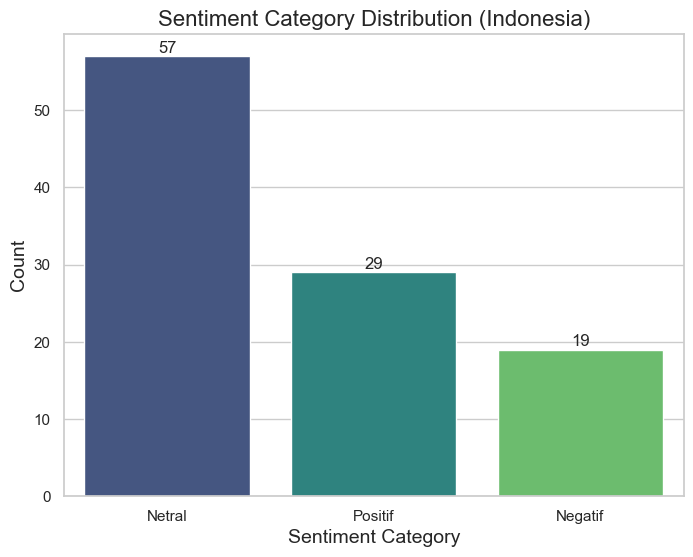

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot using seaborn
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts1.index, y=sentiment_counts1.values, palette='viridis')

# Add labels and title
plt.title('Sentiment Category Distribution (Indonesia)', fontsize=16)
plt.xlabel('Sentiment Category', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Display the values on top of the bars
for i in range(len(sentiment_counts1)):
    plt.text(i, sentiment_counts1.values[i] + 0.5, 
             sentiment_counts1.values[i], 
             ha='center', fontsize=12)

# Show the plot
plt.show()

#### Word Cloud (All and Based on Sentiment)

In [21]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


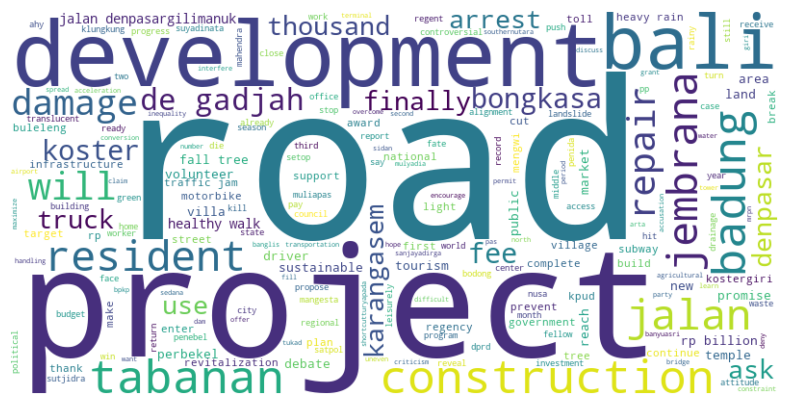

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text from the 'Churn_Reason' column into a single string
text = " ".join(cleaned_title_translated for cleaned_title_translated in data_sentiment1['cleaned_title_translated'])

# Create a word cloud
wordcloud_inggris = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_inggris, interpolation='bilinear')
plt.axis('off')  # Remove axes
plt.show()

Based on Sentiment

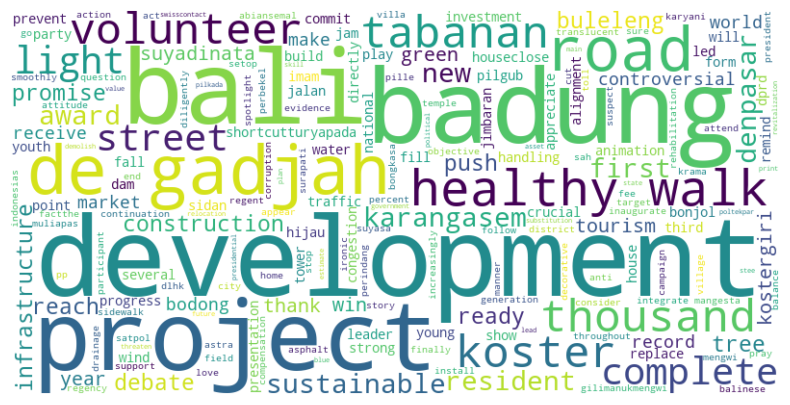

In [23]:
# Sentimen Positif
if data_sentiment1[data_sentiment1['sentiment_category_english'] == "Positif"].shape[0] != 0:
    data_sentiment1_positif = data_sentiment1[data_sentiment1['sentiment_category_english'] == "Positif"]

    text = " ".join(cleaned_title_translated for cleaned_title_translated in data_sentiment1_positif['cleaned_title_translated'])

    # Create a word cloud
    wordcloud_positif_inggris = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_positif_inggris, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else:
    print("Tidak ada sentimen positif pada berita")

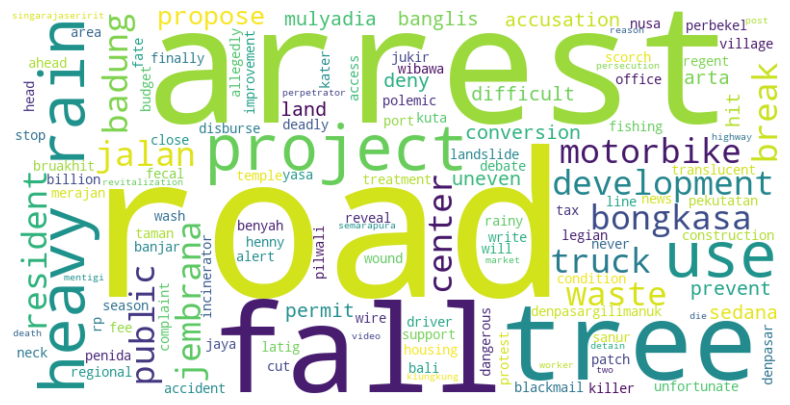

In [24]:
# Sentimen Negatif
if data_sentiment1[data_sentiment1['sentiment_category_english'] == "Negatif"].shape[0] != 0:
    data_sentiment1_negatif = data_sentiment1[data_sentiment1['sentiment_category_english'] == "Negatif"]

    text = " ".join(cleaned_title_translated for cleaned_title_translated in data_sentiment1_negatif['cleaned_title_translated'])

    # Create a word cloud
    wordcloud_negatif_inggris = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_negatif_inggris, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen negatif pada berita")

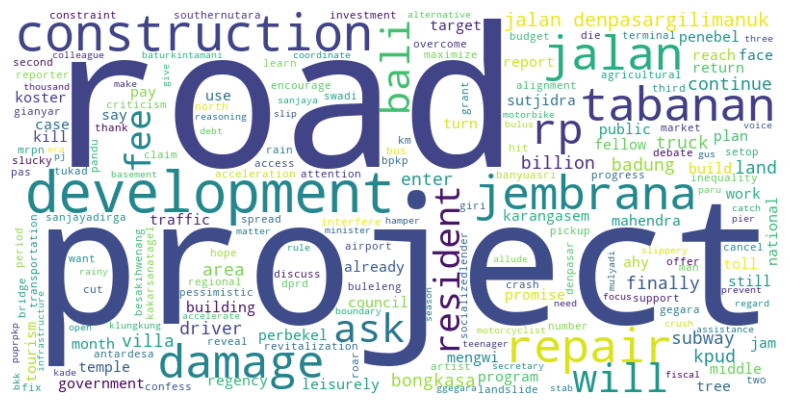

In [25]:
# Sentimen Netral
if data_sentiment1[data_sentiment1['sentiment_category_english'] == "Netral"].shape[0] != 0:
    data_sentiment1_netral = data_sentiment1[data_sentiment1['sentiment_category_english'] == "Netral"]

    text = " ".join(cleaned_title_translated for cleaned_title_translated in data_sentiment1_netral['cleaned_title_translated'])

    # Create a word cloud
    wordcloud_netral_inggris = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_netral_inggris, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen netral pada berita")

### 2. VADER

#### Sentiment

In [77]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [78]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Define a function to get sentiment scores with VADER
def get_sentiment_vader(text):
    # VADER provides a compound score which ranges from -1 (negative) to 1 (positive)
    score = sia.polarity_scores(text)['compound']
    return score

# Apply VADER to get the sentiment scores
data_sentiment1['sentiment_score_english_vader'] = data_sentiment1['cleaned_title_translated'].apply(get_sentiment_vader)

# Categorize sentiment with only 2 categories
def categorize_sentiment(score):
    if score > 0.05:  # Threshold for positive sentiment
        return 'Positif'
    elif score < -0.05:  # Threshold for negative sentiment
        return 'Negatif'
    else:
        return 'Netral'  # Scores between -0.05 and 0.05 considered neutral

data_sentiment1['sentiment_category_english_vader'] = data_sentiment1['sentiment_score_english_vader'].apply(categorize_sentiment)

C:\Users\asus\AppData\Local\Temp\ipykernel_32156\17249303.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sentiment1['sentiment_score_english_vader'] = data_sentiment1['cleaned_title_translated'].apply(get_sentiment_vader)
C:\Users\asus\AppData\Local\Temp\ipykernel_32156\17249303.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sentiment1['sentiment_category_english_vader'] = data_sentiment1['sentiment_score_english_vader'].apply(categorize_sentiment)


In [79]:
data_sentiment1.head()

keyword                                   title_translated  \
0  pembangunan  Mahendra revealed a number of construction con...   
1  pembangunan  Mahendra asked for support from AHY about the ...   
2  pembangunan  AHY Learns the Plan for the Development of Nor...   
3  pembangunan  The progress of the construction of the Sidan ...   
4  pembangunan  BPKP said that national development has not be...   

                            cleaned_title_translated  sentiment_score_english  \
0  mahendra reveal a number of construction const...                      0.0   
1  mahendra ask for support from ahy about the co...                      0.0   
2  ahy learn the plan for the development of nort...                      0.0   
3  the progress of the construction of the sidan ...                      0.2   
4  bpkp say that national development have not be...                      0.0   

  sentiment_category_english  sentiment_score_english_vader  \
0                     Netral                         0.0772   
1                     Netral                         0.4019   
2                     Netral                         0.0000   
3                    Positif                         0.6597   
4                     Netral                        -0.4023   

  sentiment_category_english_vader  
0                          Positif  
1                          Positif  
2                           Netral  
3                          Positif  
4                          Negatif

In [80]:
sentiment_counts1_vader = data_sentiment1['sentiment_category_english_vader'].value_counts()
sentiment_counts1_vader

sentiment_category_english_vader
Negatif    39
Netral     37
Positif    29
Name: count, dtype: int64

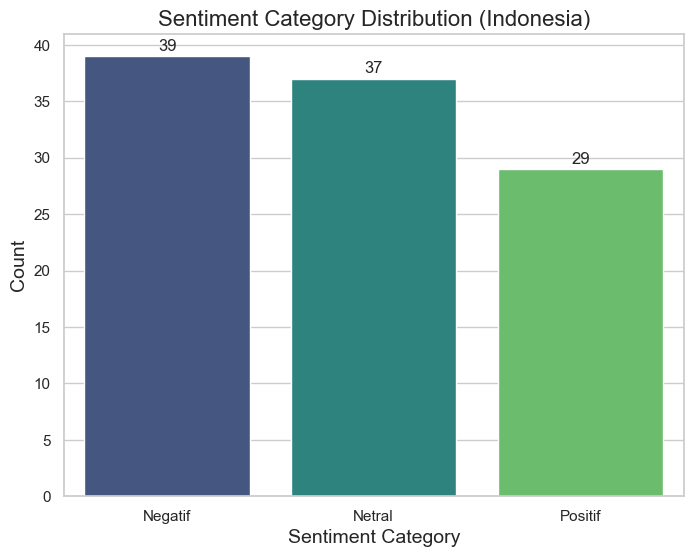

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot using seaborn
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts1_vader.index, y=sentiment_counts1_vader.values, palette='viridis')

# Add labels and title
plt.title('Sentiment Category Distribution (Indonesia)', fontsize=16)
plt.xlabel('Sentiment Category', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Display the values on top of the bars
for i in range(len(sentiment_counts1_vader)):
    plt.text(i, sentiment_counts1_vader.values[i] + 0.5, 
             sentiment_counts1_vader.values[i], 
             ha='center', fontsize=12)

# Show the plot
plt.show()

#### Word Cloud (Based on Sentiment Only)

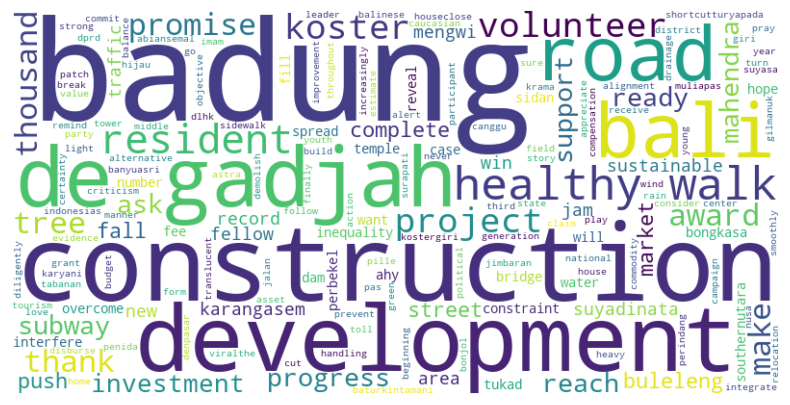

In [82]:
# Sentimen Positif
if data_sentiment1[data_sentiment1['sentiment_category_english_vader'] == "Positif"].shape[0] != 0:
    data_sentiment1_positif_vader = data_sentiment1[data_sentiment1['sentiment_category_english_vader'] == "Positif"]

    text = " ".join(cleaned_title_translated for cleaned_title_translated in data_sentiment1_positif_vader['cleaned_title_translated'])

    # Create a word cloud
    wordcloud_positif_inggris_vader = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_positif_inggris_vader, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen positif pada berita")

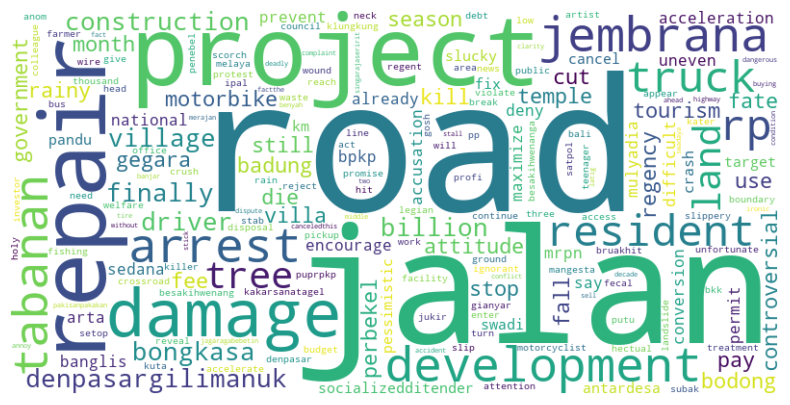

In [83]:
# Sentimen Negatif
if data_sentiment1[data_sentiment1['sentiment_category_english_vader'] == "Negatif"].shape[0] != 0:
    data_sentiment1_negatif_vader = data_sentiment1[data_sentiment1['sentiment_category_english_vader'] == "Negatif"]

    text = " ".join(cleaned_title_translated for cleaned_title_translated in data_sentiment1_negatif_vader['cleaned_title_translated'])

    # Create a word cloud
    wordcloud_negatif_inggris_vader = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_negatif_inggris_vader, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen negatif pada berita")

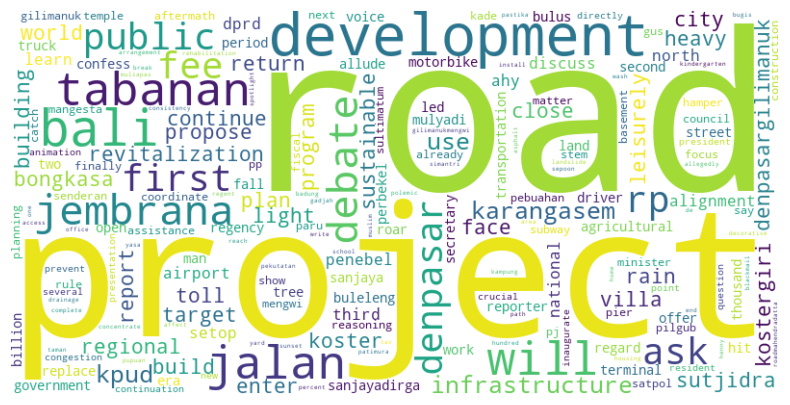

In [84]:
# Sentimen Netral
if data_sentiment1[data_sentiment1['sentiment_category_english_vader'] == "Netral"].shape[0] != 0:
    data_sentiment1_netral_vader = data_sentiment1[data_sentiment1['sentiment_category_english_vader'] == "Netral"]

    text = " ".join(cleaned_title_translated for cleaned_title_translated in data_sentiment1_netral_vader['cleaned_title_translated'])

    # Create a word cloud
    wordcloud_netral_inggris_vader = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_netral_inggris_vader, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen netral pada berita")

### 3. IndoBERT

#### Sentiment

In [85]:
pip install transforms torch

Note: you may need to restart the kernel to use updated packages.


In [86]:
data_sentiment2 = data_ready[['keyword','title','cleaned_title','content']]
data_sentiment2

keyword                                              title  \
0     pembangunan  Mahendra Ungkap Sejumlah Kendala Pembangunan S...   
1     pembangunan  Mahendra Minta Dukungan ke AHY soal Pembanguna...   
2     pembangunan  AHY Pelajari Rencana Pembangunan Bandara Bali ...   
3     pembangunan  Progres Pembangunan Bendungan Sidan Capai 95%,...   
4     pembangunan  BPKP Sebut Pembangunan Nasional Belum Maksimal...   
..            ...                                                ...   
100        proyek  Gegara Proyek Simalakama Galian C di Karangase...   
101        proyek  Poltekpar Bali dan STED Swisscontact Pimpin Pr...   
102      relokasi  Taksir Nilai Aset Belum Tuntas, Pasar Relokasi...   
103  revitalisasi  Gegara Tahun Politik, Pilkada dan Pergantian P...   
104  revitalisasi  Klungkung Ajukan Revitalisasi Pasar Umum Semar...   

                                         cleaned_title  \
0     mahendra ungkap jumlah kendala bangun subway bal   
1    mahendra minta dukung ke ahy soal bangun subwa...   
2            ahy ajar rencana bangun bandara bal utara   
3      progres bangun bendung sidan capai siap isi air   
4    bpkp sebut bangun nasional belum maksimal doro...   
..                                                 ...   
100  gegara proyek simalakama gali c di karangasem ...   
101  poltekpar bal dan sted swisscontact pimpin pro...   
102  taksir nilai aset belum tuntas pasar relokasi ...   
103  gegara tahun politik pilkada dan ganti preside...   
104  klungkung aju revitalisasi pasar umum semarapu...   

                                               content  
0    Penjabat (Pj) Gubernur Bali, Sang Made Mahendr...  
1    Penjabat (Pj) Gubernur Bali, Sang Made Mahendr...  
2    Menteri Koordinator Bidang Infrastruktur dan P...  
3    Progres pembangunan Bendungan Sidan di perbata...  
4    Pelaksana tugas (Plt) Kepala Badan Pengawasan ...  
..                                                 ...  
100                                         Karangasem  
101                                         Pendidikan  
102                                           Jembrana  
103                                            Tabanan  
104                                          Klungkung  

[105 rows x 4 columns]

In [87]:
from transformers import BertForSequenceClassification, BertTokenizer
import torch

# Load the saved model and tokenizer
model_load_path = "C:/Users/asus/OneDrive/BPS/Neraca/smsa_bpsbali_indobert_model"  # The path where the model is saved
tokenizer_load_path = "C:/Users/asus/OneDrive/BPS/Neraca/smsa_bpsbali_indobert_tokenizer"  # The path where the tokenizer is saved

# Load the model and tokenizer
model = BertForSequenceClassification.from_pretrained(model_load_path)
tokenizer = BertTokenizer.from_pretrained(tokenizer_load_path)

In [88]:
from torch.nn.functional import softmax  # Softmax function to convert logits to probabilities

# Initialize an empty list to collect predictions
sentiment_predict = []
probabilities = []

# Loop through the cleaned titles
for text in data_sentiment2['cleaned_title']:
    # Tokenize the input text
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)

    # Make prediction
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():  # Disable gradients for inference
        outputs = model(**inputs)

    # Get the logits (raw scores)
    logits = outputs.logits
    
    # Apply softmax to convert logits to probabilities
    probs = softmax(logits, dim=-1)  # Softmax along the class dimension (last dimension)

    # Get the predicted class (index of max logit)
    predicted_class = logits.argmax(dim=-1).item()

    # Get the probability of the predicted class
    predicted_prob = probs[0, predicted_class].item()

    # Convert prediction to string label
    if predicted_class == 0:
        sentiment_label = "positif"
    elif predicted_class == 1:
        sentiment_label = "netral"
    else:
        sentiment_label = "negatif"

    # Append the sentiment label and its probability
    sentiment_predict.append(sentiment_label)
    probabilities.append(predicted_prob)

# After the loop, create the DataFrame
sentiment_predict_df = pd.DataFrame({
    'sentiment': sentiment_predict,
    'probability': probabilities
})

# Add it as a new column to the original DataFrame
data_sentiment2['sentiment_score_indonesia'] = sentiment_predict_df['probability']
data_sentiment2['sentiment_category_indonesia'] = sentiment_predict_df['sentiment']

# Optionally, you can print the DataFrame to check the results
data_sentiment2


C:\Users\asus\AppData\Local\Temp\ipykernel_32156\1096017218.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sentiment2['sentiment_score_indonesia'] = sentiment_predict_df['probability']
C:\Users\asus\AppData\Local\Temp\ipykernel_32156\1096017218.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sentiment2['sentiment_category_indonesia'] = sentiment_predict_df['sentiment']


keyword                                              title  \
0     pembangunan  Mahendra Ungkap Sejumlah Kendala Pembangunan S...   
1     pembangunan  Mahendra Minta Dukungan ke AHY soal Pembanguna...   
2     pembangunan  AHY Pelajari Rencana Pembangunan Bandara Bali ...   
3     pembangunan  Progres Pembangunan Bendungan Sidan Capai 95%,...   
4     pembangunan  BPKP Sebut Pembangunan Nasional Belum Maksimal...   
..            ...                                                ...   
100        proyek  Gegara Proyek Simalakama Galian C di Karangase...   
101        proyek  Poltekpar Bali dan STED Swisscontact Pimpin Pr...   
102      relokasi  Taksir Nilai Aset Belum Tuntas, Pasar Relokasi...   
103  revitalisasi  Gegara Tahun Politik, Pilkada dan Pergantian P...   
104  revitalisasi  Klungkung Ajukan Revitalisasi Pasar Umum Semar...   

                                         cleaned_title  \
0     mahendra ungkap jumlah kendala bangun subway bal   
1    mahendra minta dukung ke ahy soal bangun subwa...   
2            ahy ajar rencana bangun bandara bal utara   
3      progres bangun bendung sidan capai siap isi air   
4    bpkp sebut bangun nasional belum maksimal doro...   
..                                                 ...   
100  gegara proyek simalakama gali c di karangasem ...   
101  poltekpar bal dan sted swisscontact pimpin pro...   
102  taksir nilai aset belum tuntas pasar relokasi ...   
103  gegara tahun politik pilkada dan ganti preside...   
104  klungkung aju revitalisasi pasar umum semarapu...   

                                               content  \
0    Penjabat (Pj) Gubernur Bali, Sang Made Mahendr...   
1    Penjabat (Pj) Gubernur Bali, Sang Made Mahendr...   
2    Menteri Koordinator Bidang Infrastruktur dan P...   
3    Progres pembangunan Bendungan Sidan di perbata...   
4    Pelaksana tugas (Plt) Kepala Badan Pengawasan ...   
..                                                 ...   
100                                         Karangasem   
101                                         Pendidikan   
102                                           Jembrana   
103                                            Tabanan   
104                                          Klungkung   

     sentiment_score_indonesia sentiment_category_indonesia  
0                     0.996643                       netral  
1                     0.990741                       netral  
2                     0.996584                       netral  
3                     0.991374                       netral  
4                     0.996273                       netral  
..                         ...                          ...  
100                   0.905528                       netral  
101                   0.955707                       netral  
102                   0.977704                       netral  
103                   0.981104                       netral  
104                   0.961284                       netral  

[105 rows x 6 columns]

In [89]:
sentiment_counts2 = data_sentiment2['sentiment_category_indonesia'].value_counts()
sentiment_counts2

sentiment_category_indonesia
netral     90
negatif    11
positif     4
Name: count, dtype: int64

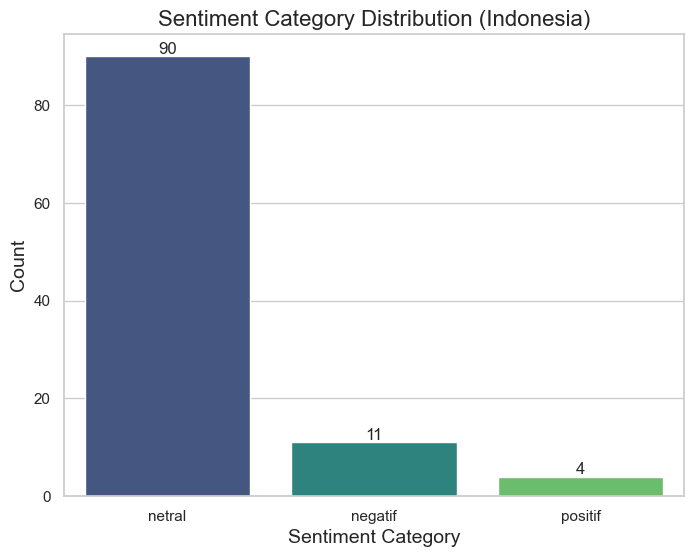

In [90]:
import seaborn as sns

# Set the style of the plot using seaborn
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts2.index, y=sentiment_counts2.values, palette='viridis')

# Add labels and title
plt.title('Sentiment Category Distribution (Indonesia)', fontsize=16)
plt.xlabel('Sentiment Category', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Display the values on top of the bars
for i in range(len(sentiment_counts2)):
    plt.text(i, sentiment_counts2.values[i] + 0.5, 
             sentiment_counts2.values[i], 
             ha='center', fontsize=12)

# Show the plot
plt.show()

#### Word Cloud (All and Based on Sentiment)

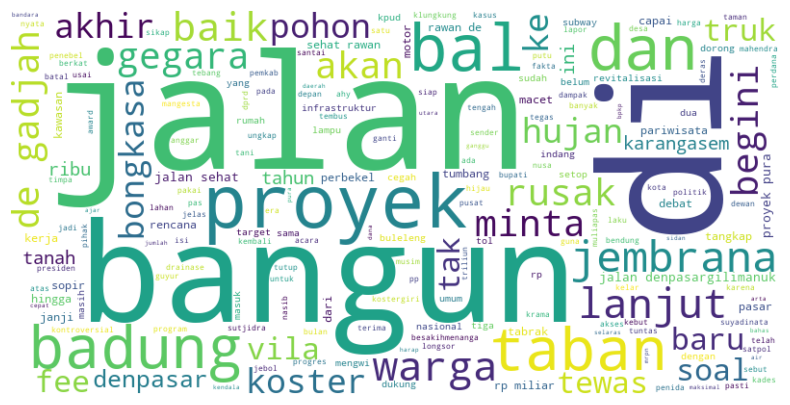

In [91]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text from the 'Churn_Reason' column into a single string
text = " ".join(cleaned_title for cleaned_title in data_sentiment2['cleaned_title'])

# Create a word cloud
wordcloud_indonesia = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_indonesia, interpolation='bilinear')
plt.axis('off')  # Remove axes
plt.show()

Based on Sentiment

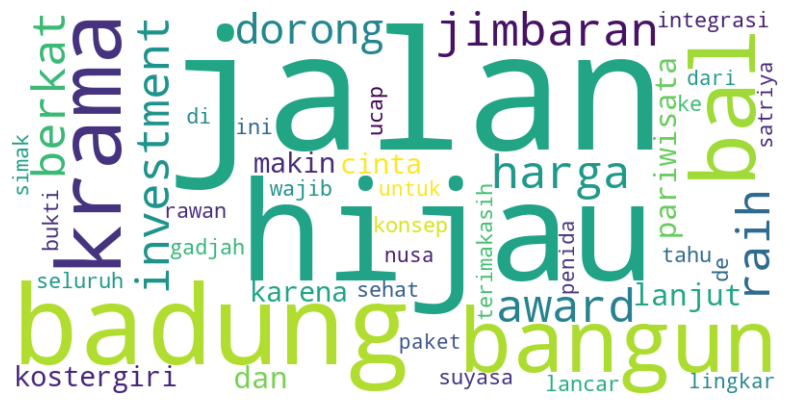

In [92]:
# Sentimen Positif
if data_sentiment2[data_sentiment2['sentiment_category_indonesia'] == "positif"].shape[0] != 0:
    data_sentiment2_positif = data_sentiment2[data_sentiment2['sentiment_category_indonesia'] == "positif"]

    text = " ".join(cleaned_title for cleaned_title in data_sentiment2_positif['cleaned_title'])

    # Create a word cloud
    wordcloud_positif_indonesia = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_positif_indonesia, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen positif pada berita")

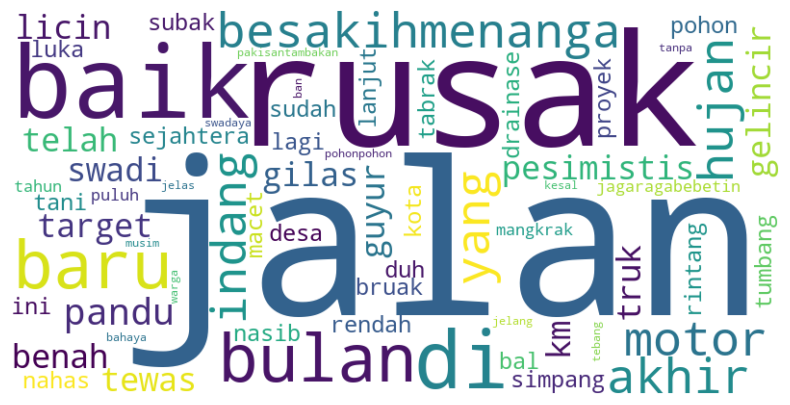

In [93]:
# Sentimen Negatif
if data_sentiment2[data_sentiment2['sentiment_category_indonesia'] == "negatif"].shape[0] != 0:
    data_sentiment2_negatif = data_sentiment2[data_sentiment2['sentiment_category_indonesia'] == "negatif"]

    text = " ".join(cleaned_title for cleaned_title in data_sentiment2_negatif['cleaned_title'])

    # Create a word cloud
    wordcloud_negatif_indonesia = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_negatif_indonesia, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen negatif pada berita")

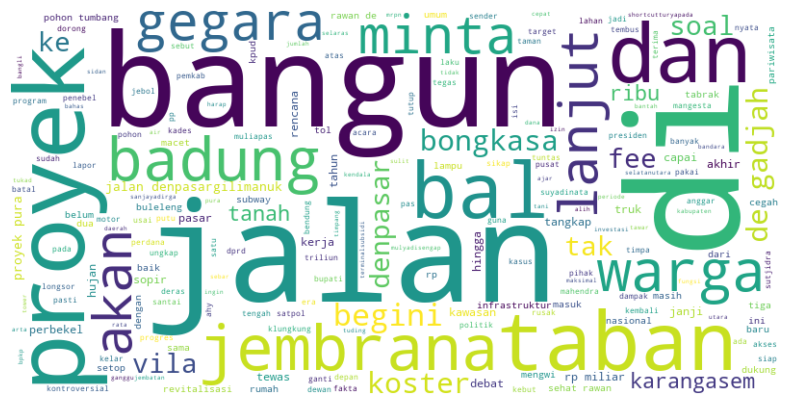

In [94]:
# Sentimen Netral
if data_sentiment2[data_sentiment2['sentiment_category_indonesia'] == "netral"].shape[0] != 0:
    data_sentiment2_netral = data_sentiment2[data_sentiment2['sentiment_category_indonesia'] == "netral"]

    text = " ".join(cleaned_title for cleaned_title in data_sentiment2_netral['cleaned_title'])

    # Create a word cloud
    wordcloud_netral_indonesia = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_netral_indonesia, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen netral pada berita")

### Export Result

In [95]:
print(data_sentiment1.shape)
data_sentiment1.head()

(105, 7)


keyword                                   title_translated  \
0  pembangunan  Mahendra revealed a number of construction con...   
1  pembangunan  Mahendra asked for support from AHY about the ...   
2  pembangunan  AHY Learns the Plan for the Development of Nor...   
3  pembangunan  The progress of the construction of the Sidan ...   
4  pembangunan  BPKP said that national development has not be...   

                            cleaned_title_translated  sentiment_score_english  \
0  mahendra reveal a number of construction const...                      0.0   
1  mahendra ask for support from ahy about the co...                      0.0   
2  ahy learn the plan for the development of nort...                      0.0   
3  the progress of the construction of the sidan ...                      0.2   
4  bpkp say that national development have not be...                      0.0   

  sentiment_category_english  sentiment_score_english_vader  \
0                     Netral                         0.0772   
1                     Netral                         0.4019   
2                     Netral                         0.0000   
3                    Positif                         0.6597   
4                     Netral                        -0.4023   

  sentiment_category_english_vader  
0                          Positif  
1                          Positif  
2                           Netral  
3                          Positif  
4                          Negatif

In [96]:
print(data_sentiment2.shape)
data_sentiment2.head()

(105, 6)


keyword                                              title  \
0  pembangunan  Mahendra Ungkap Sejumlah Kendala Pembangunan S...   
1  pembangunan  Mahendra Minta Dukungan ke AHY soal Pembanguna...   
2  pembangunan  AHY Pelajari Rencana Pembangunan Bandara Bali ...   
3  pembangunan  Progres Pembangunan Bendungan Sidan Capai 95%,...   
4  pembangunan  BPKP Sebut Pembangunan Nasional Belum Maksimal...   

                                       cleaned_title  \
0   mahendra ungkap jumlah kendala bangun subway bal   
1  mahendra minta dukung ke ahy soal bangun subwa...   
2          ahy ajar rencana bangun bandara bal utara   
3    progres bangun bendung sidan capai siap isi air   
4  bpkp sebut bangun nasional belum maksimal doro...   

                                             content  \
0  Penjabat (Pj) Gubernur Bali, Sang Made Mahendr...   
1  Penjabat (Pj) Gubernur Bali, Sang Made Mahendr...   
2  Menteri Koordinator Bidang Infrastruktur dan P...   
3  Progres pembangunan Bendungan Sidan di perbata...   
4  Pelaksana tugas (Plt) Kepala Badan Pengawasan ...   

   sentiment_score_indonesia sentiment_category_indonesia  
0                   0.996643                       netral  
1                   0.990741                       netral  
2                   0.996584                       netral  
3                   0.991374                       netral  
4                   0.996273                       netral

In [97]:
# Assigning columns individually
sentiment_result = data_sentiment2.copy()  # Copy data_sentiment2 to avoid modifying the original

# Assign columns from data_sentiment1 to sentiment_result
sentiment_result['title_translated'] = data_sentiment1['title_translated']
sentiment_result['cleaned_title_translated'] = data_sentiment1['cleaned_title_translated']
sentiment_result['sentiment_category_english'] = data_sentiment1['sentiment_category_english']
sentiment_result['sentiment_score_english'] = data_sentiment1['sentiment_score_english']
sentiment_result['sentiment_category_english_vader'] = data_sentiment1['sentiment_category_english_vader']
sentiment_result['sentiment_score_english_vader'] = data_sentiment1['sentiment_score_english_vader']

print(sentiment_result.shape)
sentiment_result.head()

(105, 12)


keyword                                              title  \
0  pembangunan  Mahendra Ungkap Sejumlah Kendala Pembangunan S...   
1  pembangunan  Mahendra Minta Dukungan ke AHY soal Pembanguna...   
2  pembangunan  AHY Pelajari Rencana Pembangunan Bandara Bali ...   
3  pembangunan  Progres Pembangunan Bendungan Sidan Capai 95%,...   
4  pembangunan  BPKP Sebut Pembangunan Nasional Belum Maksimal...   

                                       cleaned_title  \
0   mahendra ungkap jumlah kendala bangun subway bal   
1  mahendra minta dukung ke ahy soal bangun subwa...   
2          ahy ajar rencana bangun bandara bal utara   
3    progres bangun bendung sidan capai siap isi air   
4  bpkp sebut bangun nasional belum maksimal doro...   

                                             content  \
0  Penjabat (Pj) Gubernur Bali, Sang Made Mahendr...   
1  Penjabat (Pj) Gubernur Bali, Sang Made Mahendr...   
2  Menteri Koordinator Bidang Infrastruktur dan P...   
3  Progres pembangunan Bendungan Sidan di perbata...   
4  Pelaksana tugas (Plt) Kepala Badan Pengawasan ...   

   sentiment_score_indonesia sentiment_category_indonesia  \
0                   0.996643                       netral   
1                   0.990741                       netral   
2                   0.996584                       netral   
3                   0.991374                       netral   
4                   0.996273                       netral   

                                    title_translated  \
0  Mahendra revealed a number of construction con...   
1  Mahendra asked for support from AHY about the ...   
2  AHY Learns the Plan for the Development of Nor...   
3  The progress of the construction of the Sidan ...   
4  BPKP said that national development has not be...   

                            cleaned_title_translated  \
0  mahendra reveal a number of construction const...   
1  mahendra ask for support from ahy about the co...   
2  ahy learn the plan for the development of nort...   
3  the progress of the construction of the sidan ...   
4  bpkp say that national development have not be...   

  sentiment_category_english  sentiment_score_english  \
0                     Netral                      0.0   
1                     Netral                      0.0   
2                     Netral                      0.0   
3                    Positif                      0.2   
4                     Netral                      0.0   

  sentiment_category_english_vader  sentiment_score_english_vader  
0                          Positif                         0.0772  
1                          Positif                         0.4019  
2                           Netral                         0.0000  
3                          Positif                         0.6597  
4                          Negatif                        -0.4023

In [98]:
sentiment_result.to_excel("C:/Users/asus/OneDrive/BPS/Neraca/sentimentresult_sektor6_triwulan4_bali.xlsx")